In [215]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1st Part: EDA and Data Cleaning

In [216]:
# Load the dataset
df = pd.read_csv(r"C:\Users\amcys\Documents\02.Education\01.Online Education\03.DataTech Florida - Jerry Strazzeri\09.Trabalhos Finais\Walmart Project\Data\Final_database_V1.csv")
pd.set_option('display.max_columns', None)
df[df['customer_name'] == 'Amy Harrison'].head(5)

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,product_name,category,price
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN
2551,2023-05-16,6f39dc4f-cb53-49d7-8fe3-ac48cd8e14b4,375.27,Apopka,6,2,14:37:31,WCID5040,Amy Harrison,72,WDID09889,Carla James,18,66,Broccoli,Pantry,4.38
2552,2023-05-16,6f39dc4f-cb53-49d7-8fe3-ac48cd8e14b4,375.27,Apopka,6,2,14:37:31,WCID5040,Amy Harrison,72,WDID09889,Carla James,18,66,Broccoli,Pantry,4.38
2553,2023-05-16,6f39dc4f-cb53-49d7-8fe3-ac48cd8e14b4,375.27,Apopka,6,2,14:37:31,WCID5040,Amy Harrison,72,WDID09889,Carla James,18,66,Broccoli,Pantry,4.38
2777,2023-05-24,92853ff5-345c-4f40-aac9-c860151dc660,454.02,Winter Park,13,0,17:41:56,WCID5040,Amy Harrison,72,WDID10527,Matthew Brown,48,68,NaN,NaN,NaN


In [217]:
# Here we already can check a datatype error: date and delivery_hour columns are set as "object" and not time and datetime
# Other mistake is the labeling of the last three rows, they must be clearer

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10161 entries, 0 to 10160
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             10161 non-null  object 
 1   order_id         10161 non-null  object 
 2   order_amount     10161 non-null  float64
 3   region           10161 non-null  object 
 4   items_delivered  10161 non-null  int64  
 5   items_missing    10161 non-null  int64  
 6   delivery_hour    10161 non-null  object 
 7   customer_id      10161 non-null  object 
 8   customer_name    10161 non-null  object 
 9   customer_age     10161 non-null  int64  
 10  driver_id        10161 non-null  object 
 11  driver_name      10161 non-null  object 
 12  driver_age       10161 non-null  int64  
 13  driver_trips     10161 non-null  int64  
 14  product_name     1662 non-null   object 
 15  category         1662 non-null   object 
 16  price            1662 non-null   float64
dtypes: float64(2

In [218]:
# Another suspect thing happening is that for some registers, the value lost is bigger than the order price
# We can assume that the "order_amount" is the value without the lost product(s) prices
# This is a data we got in the end of the year, the person probably got time to have his refund. That can be a cause
# We'll create an extra column with the real_order_amount

df[df['price'] > 0.1].head(5)

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,product_name,category,price
18,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Hummus,Pantry,7.92
19,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Olive Oil,Pantry,6.09
20,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Croutons,Pantry,13.31
21,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Ground Beef,Pantry,13.27
22,2023-02-13,fe4bffcc-e466-4f05-b111-777a4808abcd,980.99,Sanford,15,1,12:10:18,WCID5145,Joshua Davis,34,WDID10066,Ryan Gomez,18,60,Flour,Pantry,3.48


In [219]:
# Correct date column type 

df['date'] = pd.to_datetime(df['date'])
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10161 entries, 0 to 10160
Series name: date
Non-Null Count  Dtype         
--------------  -----         
10161 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 79.5 KB


In [220]:
# Correct delivery_hour to time

df['delivery_hour'] = pd.to_datetime(df['delivery_hour'], format='%H:%M:%S', errors='coerce').dt.time
type(df['delivery_hour'].iloc[0])

datetime.time

In [221]:
# Rename Last Three Columns

df = df.rename(columns={'product_name': 'missing_product_name', 
                   'category': 'missing_product_category',
                   'price': 'product_amount_price'})
df.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN


In [222]:
# Total orders per client
df_nodup = df.drop_duplicates()
total_orders = df_nodup.groupby('customer_id')['order_id'].count()
df_nodup['customer_orders'] = df_nodup['customer_id'].map(total_orders)
df_nodup.head()

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\73701969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup['customer_orders'] = df_nodup['customer_id'].map(total_orders)


,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN,10
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN,7
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN,11
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN,7
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN,5


In [223]:
# Create New dataset with only orders with lost products
df_lost = df_nodup[df_nodup['product_amount_price'] > 0]
df_lost.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders
18,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Hummus,Pantry,7.92,7
19,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Olive Oil,Pantry,6.09,7
20,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Croutons,Pantry,13.31,12
21,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Ground Beef,Pantry,13.27,12
22,2023-02-13,fe4bffcc-e466-4f05-b111-777a4808abcd,980.99,Sanford,15,1,12:10:18,WCID5145,Joshua Davis,34,WDID10066,Ryan Gomez,18,60,Flour,Pantry,3.48,9


In [224]:
df_lost[df_lost['customer_name'] == 'Sharon Allen']

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders
1418,2023-04-05,6d98ef23-9d70-49d3-a9f5-1fb0fc1445f3,44.38,Sanford,7,1,03:51:43,WCID5903,Sharon Allen,34,WDID10069,Ms. Lindsay Carpenter,19,77,Chicken Wings,Pantry,19.38,1
4404,2023-12-16,4921c95d-5a84-482c-be25-67b554a4303a,206.76,Altamonte Springs,8,1,07:01:21,WCID5729,Sharon Allen,45,WDID10673,Jasmine Nash,59,61,Uncured Bacon,Pantry,4.67,8
7243,2023-09-27,babe85c8-3680-4809-9312-24507904042f,492.83,Clermont,3,1,17:40:29,WCID5729,Sharon Allen,45,WDID10548,Chase Ball,47,19,Shredded Carrots,Pantry,13.83,8
8840,2023-06-30,c07bbd53-89a3-4c01-9b9d-729d30553e52,452.38,Clermont,9,1,12:48:03,WCID5729,Sharon Allen,45,WDID10624,Carrie Savage,49,72,Granola Bars,Pantry,8.23,8


In [225]:
# Create a new smaller database
df_lost_cost_total = df_lost[['order_id', 'customer_id', 'customer_name', 'customer_orders', 'driver_id', 'driver_name', 'driver_trips']]

# Remove duplicates
df_lost_cost_total = df_lost_cost_total.drop_duplicates()

# Create variables
suspect_customers = df_lost_cost_total['customer_id'].value_counts()
suspect_drivers = df_lost_cost_total['driver_id'].value_counts()

# New 2 columns based on previous variables
df_lost_cost_total['customer_incidence'] = df_lost_cost_total['customer_id'].map(suspect_customers)
df_lost_cost_total['driver_incidence'] = df_lost_cost_total['driver_id'].map(suspect_drivers)

# % of lost orders
df_lost_cost_total['lost_incidence_driver'] = round(df_lost_cost_total['driver_incidence'] / df_lost_cost_total['driver_trips'], 3)
df_lost_cost_total['lost_incidence_customer'] = round(df_lost_cost_total['customer_incidence'] / df_lost_cost_total['customer_orders'], 3)

df_lost_cost_total.head(5)



,order_id,customer_id,customer_name,customer_orders,driver_id,driver_name,driver_trips,customer_incidence,driver_incidence,lost_incidence_driver,lost_incidence_customer
18,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,WCID5065,Bruce Ruiz,7,WDID10064,Charlotte Davila,37,2,4,0.108,0.286
20,de6343f9-fa09-4cac-8da8-7c2706825e22,WCID5028,Allison Barker,12,WDID10389,Megan Smith,64,2,4,0.062,0.167
22,fe4bffcc-e466-4f05-b111-777a4808abcd,WCID5145,Joshua Davis,9,WDID10066,Ryan Gomez,60,2,4,0.067,0.222
23,849e79f0-13bf-4a80-bc02-62c208ebe4cd,WCID5762,Matthew Osborne,8,WDID10730,Kevin Gilmore,11,3,3,0.273,0.375
24,9923a278-e245-4836-aa35-5f6b7f28428f,WCID5228,Mr. Gregory Luna,13,WDID10740,Ronald Doyle,78,4,3,0.038,0.308


In [226]:
# ==========================================================================================================================================================
# The quantile segmentation (recurrency) was used before, but showed not very efficiente due to lack of detail and precision;
# We decided later to do a different type of segmentation, based on 4 criterias:
# 1st: Number of recurrency.
# 2nd: Total lost value.
# 3rd: Critical Area.
# 4th: Average Loss ticket (Total Lost/Number of incidences). -> Sometimes the driver/customer has only lost one/two products but with a very high price $
# ==========================================================================================================================================================


# Quantile Segmentation for drivers 
df_lost_cost_total['fraudulent_driver?'] = pd.qcut(df_lost_cost_total['lost_incidence_driver'], q=5, labels=['Very Unlikely', 'Unlikely', 'Maybe', 'Probable', 'Very Probable'])

# Quantile Segmentation for customers
df_lost_cost_total['fraudulent_customer?'] = pd.qcut(df_lost_cost_total['lost_incidence_customer'], q=5, labels=['Very Unlikely', 'Unlikely', 'Maybe', 'Probable', 'Very Probable'])

df_lost_cost_total.head()


,order_id,customer_id,customer_name,customer_orders,driver_id,driver_name,driver_trips,customer_incidence,driver_incidence,lost_incidence_driver,lost_incidence_customer,fraudulent_driver?,fraudulent_customer?
18,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,WCID5065,Bruce Ruiz,7,WDID10064,Charlotte Davila,37,2,4,0.108,0.286,Probable,Probable
20,de6343f9-fa09-4cac-8da8-7c2706825e22,WCID5028,Allison Barker,12,WDID10389,Megan Smith,64,2,4,0.062,0.167,Unlikely,Unlikely
22,fe4bffcc-e466-4f05-b111-777a4808abcd,WCID5145,Joshua Davis,9,WDID10066,Ryan Gomez,60,2,4,0.067,0.222,Unlikely,Maybe
23,849e79f0-13bf-4a80-bc02-62c208ebe4cd,WCID5762,Matthew Osborne,8,WDID10730,Kevin Gilmore,11,3,3,0.273,0.375,Very Probable,Very Probable
24,9923a278-e245-4836-aa35-5f6b7f28428f,WCID5228,Mr. Gregory Luna,13,WDID10740,Ronald Doyle,78,4,3,0.038,0.308,Very Unlikely,Probable


In [227]:
df_lost_cost_total.sort_values(by='lost_incidence_customer', ascending=False).head()

,order_id,customer_id,customer_name,customer_orders,driver_id,driver_name,driver_trips,customer_incidence,driver_incidence,lost_incidence_driver,lost_incidence_customer,fraudulent_driver?,fraudulent_customer?
1418,6d98ef23-9d70-49d3-a9f5-1fb0fc1445f3,WCID5903,Sharon Allen,1,WDID10069,Ms. Lindsay Carpenter,77,1,4,0.052,1.000,Very Unlikely,Very Probable
270,a61b84d4-a3e9-471f-897f-94930a3562a6,WCID5131,James Vargas,4,WDID10630,Jennifer Collins,64,3,3,0.047,0.750,Very Unlikely,Very Probable
4482,d6318514-2a53-4eaf-9a33-39e6c3fbf359,WCID5131,James Vargas,4,WDID10491,Cristina Martin,57,3,4,0.070,0.750,Unlikely,Very Probable
7169,ab7b4e84-fd36-4033-9b12-f4c3c633d1a6,WCID5131,James Vargas,4,WDID10093,Justin Gregory,56,3,4,0.071,0.750,Maybe,Very Probable
4479,0718e76d-daea-4e83-a901-928fb8550c25,WCID5711,Matthew Barker,3,WDID10733,Carla Ramirez,74,2,3,0.041,0.667,Very Unlikely,Very Probable


In [228]:
# Check the driver's intervals
bins = pd.qcut(df_lost_cost_total['lost_incidence_driver'], q=5)
bins.unique()

[(0.093, 0.138], (0.055, 0.07], (0.138, 0.364], (0.037, 0.055], (0.07, 0.093]]
Categories (5, interval[float64, right]): [(0.037, 0.055] < (0.055, 0.07] < (0.07, 0.093] < (0.093, 0.138] < (0.138, 0.364]]

In [229]:
# Check the customer's intervals
bins = pd.qcut(df_lost_cost_total['lost_incidence_customer'], q=5)
bins.unique()

[(0.25, 0.333], (0.143, 0.2], (0.2, 0.25], (0.333, 1.0], (0.061, 0.143]]
Categories (5, interval[float64, right]): [(0.061, 0.143] < (0.143, 0.2] < (0.2, 0.25] < (0.25, 0.333] < (0.333, 1.0]]

In [230]:
# Reordering the columns
# This will become a new table in our Power BI

cols = [
    'order_id',
    'customer_id',
    'customer_name',
    'customer_orders',
    'customer_incidence',
    'lost_incidence_customer',
    'fraudulent_customer?',
    'driver_id',
    'driver_name',
    'driver_trips',
    'driver_incidence',
    'lost_incidence_driver',
    'fraudulent_driver?'
]

df_lost_cost_total = df_lost_cost_total[cols]
df_lost_cost_total.head()

df_lost_cost_customers = df_lost_cost_total[['customer_id', 
                                            'customer_name',
                                            'customer_orders', 
                                            'customer_incidence', 
                                            'lost_incidence_customer', 
                                            'fraudulent_customer?']]

df_lost_cost_drivers = df_lost_cost_total[['driver_id',
                                          'driver_name',
                                          'driver_trips',
                                          'driver_incidence',
                                          'lost_incidence_driver',
                                          'fraudulent_driver?']]

#Now we have the data of the customers that had a incidence
df_lost_cost_customers.drop_duplicates()

#The same with the drivers
df_lost_cost_drivers.drop_duplicates()

,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?
18,WDID10064,Charlotte Davila,37,4,0.108,Probable
20,WDID10389,Megan Smith,64,4,0.062,Unlikely
22,WDID10066,Ryan Gomez,60,4,0.067,Unlikely
23,WDID10730,Kevin Gilmore,11,3,0.273,Very Probable
24,WDID10740,Ronald Doyle,78,3,0.038,Very Unlikely
...,...,...,...,...,...,...
7222,WDID10626,Michael Wise,56,3,0.054,Very Unlikely
7588,WDID10257,Paul Lyons,29,4,0.138,Probable
7615,WDID10560,Justin Randall,60,3,0.050,Very Unlikely
8343,WDID10695,Elizabeth Williams,67,3,0.045,Very Unlikely


In [231]:
# ==================Important Comment!===============================
# In our df we have this dilemma:
#| Order_id | Items Missing | missing_product_name | customer_orders
#| -------- | ------------- | -------------------- | ---------------
#| 1        | 2             | apple                | 11
#| 1        | 2             | apple                | NaN
#| 2        | 2             | TV                   | 5
#| 2        | 2             | Bread                | 5
# 1. For the order_id 1, we clearly have a duplicate value. This was already treated, getting the df_nodup dataset
# 2. For the second case, we just need to remove all those values that are null in "customer_orders"
# 3. For the third case
# Solving this problem will let us calculate the total_amount_lost
# We will use Bruce Ruiz as an Example
# ==================Important Comment!===============================

#df_nodup[(df_nodup['customer_orders'].notna()) & (df_nodup['items_missing'] == 2)]
total_lost = df.groupby('order_id')['items_missing'].max()

#df_nodup

df_bruce = df_nodup[
    (df_nodup['customer_orders'].notna()) &
    (df_nodup['missing_product_name'].notna())
].copy() 

#Number_of_lost_items will count the lost products by quantity
#Number_of_items will count the lost products by type
df_bruce['number_of_lost_items'] = df_bruce.groupby('order_id')['items_missing'].transform('max')
df_bruce['number_of_items'] = df_bruce.groupby('order_id')['missing_product_name'].transform('nunique')

#If they are equal = 1, otherwise = 0
df_bruce['Check'] = (df_bruce['number_of_lost_items'] == df_bruce['number_of_items'])*1

#If the check = 0, we can multiply the product_amount_price for the number_of_lost_items
df_bruce['multiplier'] = np.where(df_bruce['Check'] == 0, 
                                  df_bruce['number_of_lost_items'],
                                  1)



In [232]:
#Column 'Multiplier' in main dataset
right = df_bruce[['order_id','multiplier']].drop_duplicates('order_id')
df_nodup = df_nodup.merge(right, on='order_id', how='left')


In [233]:
#Calculating the total real value
df_nodup['total_lost_value'] = df_nodup['product_amount_price'] * df_nodup['multiplier']

In [234]:
#Quick check
df_nodup[df_nodup['customer_name'] == 'Elijah Taylor']

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders,multiplier,total_lost_value
26,2023-02-13,1543d453-775c-4e45-91df-5bc80d42424f,585.48,Apopka,11,0,10:39:42,WCID5170,Elijah Taylor,30,WDID10599,Seth Molina,47,32,NaN,NaN,NaN,16,NaN,NaN
287,2023-02-22,d0f85538-bc5f-4cd6-80ab-921a892523c4,437.74,Sanford,3,0,04:31:31,WCID5170,Elijah Taylor,30,WDID10180,Debbie Gross,20,60,NaN,NaN,NaN,16,NaN,NaN
640,2023-03-07,15c60387-159c-4c44-a4c3-d5801f0e712a,277.88,Altamonte Springs,9,0,14:17:29,WCID5170,Elijah Taylor,30,WDID10056,Heather Gibson,18,21,NaN,NaN,NaN,16,NaN,NaN
1245,2023-03-28,d6dbf725-c1a0-438d-b8b6-fe02e91ffbe9,36.75,Altamonte Springs,3,0,08:52:33,WCID5170,Elijah Taylor,30,WDID09955,Taylor Gray,18,63,NaN,NaN,NaN,16,NaN,NaN
1341,2023-04-02,a953956f-aa41-4b5c-865d-9ee8d5d4422f,457.80,Kissimmee,10,0,11:01:59,WCID5170,Elijah Taylor,30,WDID10756,Sherry Dunn,56,50,NaN,NaN,NaN,16,NaN,NaN
1630,2023-04-12,f79a36c7-8a12-438f-8b67-257728a38810,334.63,Clermont,13,0,09:53:37,WCID5170,Elijah Taylor,30,WDID11009,Deborah Juarez,52,32,NaN,NaN,NaN,16,NaN,NaN
2812,2023-05-26,b5dfaf80-d95e-4dc8-a782-b58402a75155,201.16,Kissimmee,14,0,05:56:29,WCID5170,Elijah Taylor,30,WDID10290,Sandra Lane,21,45,NaN,NaN,NaN,16,NaN,NaN
3132,2023-11-01,c7a343f7-3f1d-497c-8004-b9ede2d48fb1,634.57,Clermont,14,3,13:50:54,WCID5170,Elijah Taylor,30,WDID09873,Pamela Moore,18,64,Kellogg's Frosties,Pantry,12.53,16,3.0,37.59
4136,2023-12-07,da7534d1-84d6-44ae-bd60-611b8a365fc6,378.75,Apopka,16,0,02:25:34,WCID5170,Elijah Taylor,30,WDID10329,Juan Melendez,22,25,NaN,NaN,NaN,16,NaN,NaN
4857,2023-01-02,0db14afa-c71f-4e08-9024-de6b910664aa,347.33,Clermont,4,0,08:21:34,WCID5170,Elijah Taylor,30,WDID10543,Mr. Kenneth Adams,60,62,NaN,NaN,NaN,16,NaN,NaN


In [235]:
df_nodup.shape

(10125, 20)

In [236]:
#merging the customer identifications
right = df_lost_cost_customers[['customer_id','customer_incidence', 'lost_incidence_customer', 'fraudulent_customer?']].drop_duplicates('customer_id')
df_nodup = df_nodup.merge(right, on='customer_id',how='left')
df_nodup.shape


(10125, 23)

In [237]:
#merging the driver identifications
right = df_lost_cost_drivers[['driver_id','driver_incidence','lost_incidence_driver','fraudulent_driver?']].drop_duplicates('driver_id')
df_nodup = df_nodup.merge(right, on='driver_id', how='left')
df_nodup.shape

(10125, 26)

In [238]:
df_nodup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      10125 non-null  datetime64[ns]
 1   order_id                  10125 non-null  object        
 2   order_amount              10125 non-null  float64       
 3   region                    10125 non-null  object        
 4   items_delivered           10125 non-null  int64         
 5   items_missing             10125 non-null  int64         
 6   delivery_hour             10125 non-null  object        
 7   customer_id               10125 non-null  object        
 8   customer_name             10125 non-null  object        
 9   customer_age              10125 non-null  int64         
 10  driver_id                 10125 non-null  object        
 11  driver_name               10125 non-null  object        
 12  driver_age        

In [239]:
#Real order_amount
df_nodup['real_order_amount'] = df_nodup['order_amount'] + df_nodup['total_lost_value']
df_nodup.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders,multiplier,total_lost_value,customer_incidence,lost_incidence_customer,fraudulent_customer?,driver_incidence,lost_incidence_driver,fraudulent_driver?,real_order_amount
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN,10,NaN,NaN,1.0,0.100,Very Unlikely,3.0,0.062,Unlikely,NaN
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN,11,NaN,NaN,1.0,0.091,Very Unlikely,NaN,NaN,NaN,NaN
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN,7,NaN,NaN,1.0,0.143,Very Unlikely,NaN,NaN,NaN,NaN
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN,5,NaN,NaN,1.0,0.200,Unlikely,NaN,NaN,NaN,NaN


In [240]:
#% of Lost Segmentation
df_nodup['% Total Lost'] = (df_nodup['total_lost_value'] / df_nodup['real_order_amount'])*100
df_nodup.sort_values(by='% Total Lost',ascending=False).head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders,multiplier,total_lost_value,customer_incidence,lost_incidence_customer,fraudulent_customer?,driver_incidence,lost_incidence_driver,fraudulent_driver?,real_order_amount,% Total Lost
3650,2023-11-20,99e4b640-fa1e-4141-b837-90906b296c71,24.63,Kissimmee,1,1,10:33:19,WCID5923,Kenneth Brown,19,WDID10651,Seth Smith,32,56,Sony PlayStation 5,Gaming & Entertainment,880.38,7,1.0,880.38,4.0,0.571,Very Probable,3.0,0.054,Very Unlikely,905.01,97.278483
2736,2023-05-23,21c76fb6-71a2-43e0-9f40-12666d48f446,20.54,Sanford,19,1,10:48:22,WCID5685,Shelley Gould,85,WDID10474,Aaron Garcia,35,66,Roku Ultra Streaming Device,Gaming & Entertainment,632.85,12,1.0,632.85,7.0,0.583,Very Probable,4.0,0.061,Unlikely,653.39,96.856395
9932,2023-08-07,6cda61cf-8c97-4818-8d94-6d7fc90b7d27,24.09,Orlando,17,1,17:15:07,WCID5228,Mr. Gregory Luna,25,WDID10628,Barry Rodriguez,62,19,Bose QuietComfort Earbuds,Audio Devices,585.52,13,1.0,585.52,4.0,0.308,Probable,3.0,0.158,Very Probable,609.61,96.048293
5548,2023-01-27,e565848b-a180-47dd-9765-b444eea2b339,42.71,Winter Park,4,1,14:19:06,WCID6039,Matthew Lutz,72,WDID10726,Lindsey Johnson,46,34,GoPro Hero 9,Cameras & Drones,908.87,8,1.0,908.87,2.0,0.250,Maybe,3.0,0.088,Maybe,951.58,95.511675
868,2023-03-16,600c0c37-ecf0-4f46-bd45-f23e816be241,29.98,Clermont,19,1,19:07:14,WCID5972,David Morris,70,WDID10736,Casey Wood,55,69,Bose QuietComfort Earbuds,Audio Devices,585.52,10,1.0,585.52,1.0,0.100,Very Unlikely,3.0,0.043,Very Unlikely,615.50,95.129163


# 2nd Part: Data Visualization

## 2.1 Understanding the lost products

For that, we will build the following charts:

1. **Bar Chart** – total lost per region  
2. **Scatterplot Chart** – total lost per driver and customer  
3. **Pie Chart** – total lost among probable fraudulent customers and drivers  
4. **Line (Area) Chart** – total lost during the hours of the day  
5. **Horizontal Bar Chart** – total lost per product category


### 1.Bar Chart - Total Lost per Region

In [241]:
df_nodup.head()
total_lost = df_nodup['total_lost_value'].sum()
total_lost

np.float64(149298.18000000002)

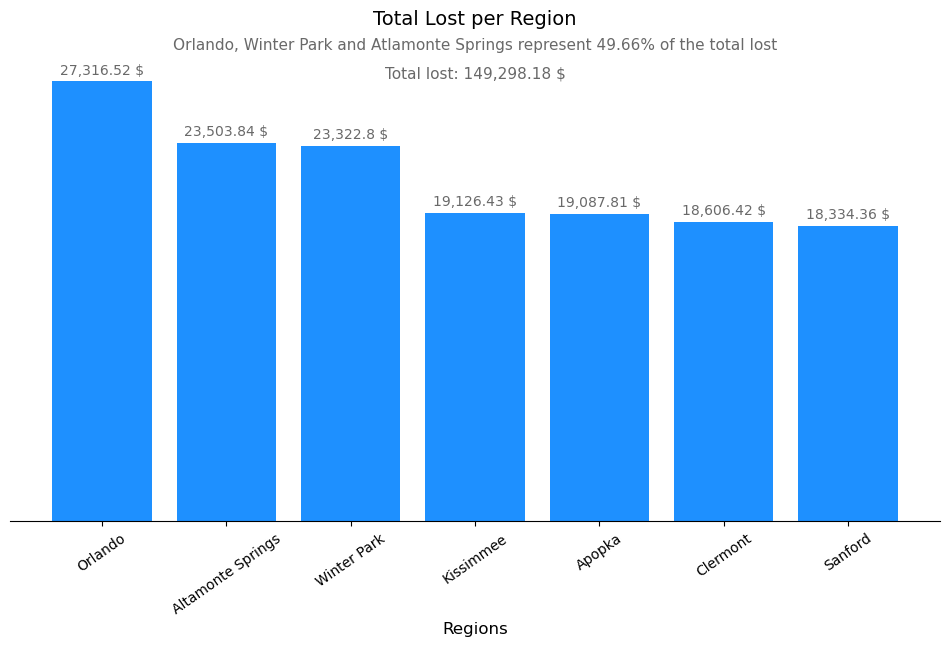

In [242]:
#1 Bar Chart - Total Lost per Region

total_lost_value = df_nodup['total_lost_value'].sum()
formatted_lost_value = f'{round(total_lost_value,2):,} $'
total_lost = df_nodup.groupby('region')['total_lost_value'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (12,6)) 
bar_chart = ax.bar(total_lost.index, total_lost.values, color = 'dodgerblue')

ax.set_title('Total Lost per Region', fontsize = 14, pad=25)
ax.set_xlabel('Regions', fontsize = 12)
ax.set_ylabel('') # Removethe Y label
ax.set_axisbelow(True) 
ax.grid(True, axis='y', alpha = 0.4, linestyle = '-')
ax.grid(False, axis='x') #bug ?
ax.bar_label(bar_chart, labels=[f'{round(x,2):,} $' for x in total_lost.values], padding = 3, fontsize = 10, color = "dimgrey") #For displaying the values on top of the bars

sns.despine(left=True)

plt.xticks(rotation=35)
plt.yticks([]) #Removes the Y label values
plt.text(0.5, 1.02, 'Orlando, Winter Park and Atlamonte Springs represent 49.66% of the total lost', transform = ax.transAxes, ha='center', fontsize = 11, color = "dimgray")
plt.text(0.5, 0.96, 'Total lost: ' + str(formatted_lost_value) , transform = ax.transAxes, ha='center', fontsize = 11, color = "dimgray")


plt.show()


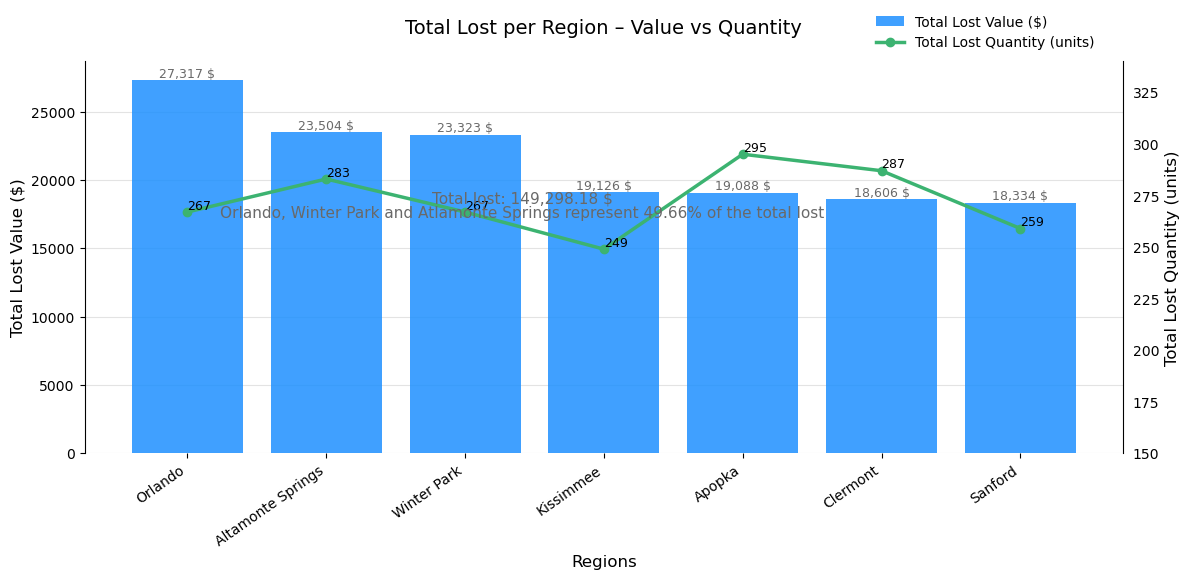

In [243]:
# Combo Chart – Total Lost Value ($) + Total Lost Quantity per Region

value_by_region = (
    df_nodup.groupby('region')['total_lost_value']
    .sum()
    .sort_values(ascending=False)
)
qty_by_region = (
    df_nodup.groupby('region')['items_missing']
    .sum()
    .reindex(value_by_region.index)  # align order
)

regions = value_by_region.index.tolist()
x = np.arange(len(regions))

fig, ax_val = plt.subplots(figsize=(12, 6))
ax_qty = ax_val.twinx()  # secondary axis for quantity

bars = ax_val.bar(x, value_by_region.values, color='dodgerblue', alpha=0.85, label='Total Lost Value ($)')

ax_qty.plot(x, qty_by_region.values, color='mediumseagreen', marker='o', linewidth=2.5, label='Total Lost Quantity (units)')
ax_qty.set_ylim(150, 340)

ax_val.set_title('Total Lost per Region – Value vs Quantity', fontsize=14, pad=20)
ax_val.set_xlabel('Regions', fontsize=12)
ax_val.set_ylabel('Total Lost Value ($)', fontsize=12)
ax_qty.set_ylabel('Total Lost Quantity (units)', fontsize=12)

ax_val.set_xticks(x)
ax_val.set_xticklabels(regions, rotation=35, ha='right')

ax_val.set_axisbelow(True)
ax_val.grid(True, axis='y', alpha=0.35, linestyle='-')
sns.despine(ax=ax_val, bottom=True)
sns.despine(ax=ax_qty, right=False, left=True, bottom=True)

for bar in bars:
    height = bar.get_height()
    ax_val.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f} $', ha='center', va='bottom', fontsize=9, color='dimgray')

for i, v in enumerate(qty_by_region.values):
    ax_qty.text(x[i], v, f'{int(v):,}', color='black', fontsize=9, ha='left', va='bottom', )

handles1, labels1 = ax_val.get_legend_handles_labels()
handles2, labels2 = ax_qty.get_legend_handles_labels()
ax_val.legend(handles1 + handles2, labels1 + labels2, loc='upper left', frameon=False, bbox_to_anchor=(0.75, 1.15))

plt.text(0.4, 0.64, 'Orlando, Winter Park and Atlamonte Springs represent 49.66% of the total lost', transform = ax.transAxes, ha='center', fontsize = 11, color = "dimgray")
plt.text(0.4, 0.67, 'Total lost: ' + str(formatted_lost_value) , transform = ax.transAxes, ha='center', fontsize = 11, color = "dimgray")

plt.tight_layout()
plt.show()


In [244]:
# Calculate the percentage of the top 3 regions
regions = ['Orlando', 'Altamonte Springs', 'Winter Park']
total_lost_region = df.groupby('region')['product_amount_price'].sum()
select_total = total_lost_region.loc[regions].sum()
total_lost = total_lost_region.sum()
percentage = (select_total/total_lost)*100
print(percentage)

49.66474107937191


In [245]:
df_nodup[df_nodup['total_lost_value'] > 0].head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders,multiplier,total_lost_value,customer_incidence,lost_incidence_customer,fraudulent_customer?,driver_incidence,lost_incidence_driver,fraudulent_driver?,real_order_amount,% Total Lost
18,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Hummus,Pantry,7.92,7,1.0,7.92,2.0,0.286,Probable,4.0,0.108,Probable,86.20,9.187935
19,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Olive Oil,Pantry,6.09,7,1.0,6.09,2.0,0.286,Probable,4.0,0.108,Probable,84.37,7.218206
20,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Croutons,Pantry,13.31,12,1.0,13.31,2.0,0.167,Unlikely,4.0,0.062,Unlikely,147.04,9.051959
21,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Ground Beef,Pantry,13.27,12,1.0,13.27,2.0,0.167,Unlikely,4.0,0.062,Unlikely,147.00,9.027211
22,2023-02-13,fe4bffcc-e466-4f05-b111-777a4808abcd,980.99,Sanford,15,1,12:10:18,WCID5145,Joshua Davis,34,WDID10066,Ryan Gomez,18,60,Flour,Pantry,3.48,9,1.0,3.48,2.0,0.222,Maybe,4.0,0.067,Unlikely,984.47,0.353490


In [246]:
# ==========================================================================================================================================================
# The quantile segmentation (recurrency) was used before, but showed very ineffective due to lack of detail and precision;
# To make the following segmentation, we'll use a different strategy of segmentation, based of 3 criterias:
# 1st: Recurrency.
# 2nd: Total lost value.
# 3rd: Average Loss ticket (Total Lost/Recurrency). -> Sometimes the driver/customer has only lost one/two products but with a very high price $
# -------------------- RULES FOR SEGMENTATION (New column: Critical?) --------------------
# At least one criteria: Low
# 2 criterias: Medium
# 3 criterias: High
# ==========================================================================================================================================================

In [247]:
df_critical_customers = df_nodup[['customer_id', 
                                  'customer_name',
                                  'customer_orders', 
                                  'customer_incidence', 
                                  'lost_incidence_customer', 
                                  'fraudulent_customer?',
                                  'total_lost_value']]

df_critical_drivers = df_nodup[['driver_id',
                                'driver_name',
                                'driver_trips',
                                'driver_incidence',
                                'lost_incidence_driver',
                                'fraudulent_driver?',
                                'total_lost_value']]

In [248]:
df_critical_customers['total_lost_customer'] = df_critical_customers.groupby('customer_id')['total_lost_value'].transform('sum')

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\3852974085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_customers['total_lost_customer'] = df_critical_customers.groupby('customer_id')['total_lost_value'].transform('sum')


In [249]:
df_critical_customers[df_critical_customers['total_lost_customer'] > 0].head()

,customer_id,customer_name,customer_orders,customer_incidence,lost_incidence_customer,fraudulent_customer?,total_lost_value,total_lost_customer
0,WCID5359,Amanda Frank,10,1.0,0.100,Very Unlikely,NaN,19.38
2,WCID5040,Amy Harrison,11,1.0,0.091,Very Unlikely,NaN,8.76
3,WCID5867,Jose Jennings,7,1.0,0.143,Very Unlikely,NaN,12.47
4,WCID6045,Zachary Campbell,5,1.0,0.200,Unlikely,NaN,12.63
5,WCID5332,Brian Bender,13,1.0,0.077,Very Unlikely,NaN,26.71


1st Criteria

In [250]:
check_60 = lambda x: x>60
df_critical_customers['total_lost_indicator_2'] = df_critical_customers['total_lost_customer'].apply(check_60).map({True: 1, False:0})
df_critical_customers.head()

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\1669924917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_customers['total_lost_indicator_2'] = df_critical_customers['total_lost_customer'].apply(check_60).map({True: 1, False:0})


,customer_id,customer_name,customer_orders,customer_incidence,lost_incidence_customer,fraudulent_customer?,total_lost_value,total_lost_customer,total_lost_indicator_2
0,WCID5359,Amanda Frank,10,1.0,0.100,Very Unlikely,NaN,19.38,0
1,WCID5000,Dustin Spencer,7,NaN,NaN,NaN,NaN,0.00,0
2,WCID5040,Amy Harrison,11,1.0,0.091,Very Unlikely,NaN,8.76,0
3,WCID5867,Jose Jennings,7,1.0,0.143,Very Unlikely,NaN,12.47,0
4,WCID6045,Zachary Campbell,5,1.0,0.200,Unlikely,NaN,12.63,0


2nd Criteria

In [251]:
df_critical_customers['lost_incidence_customer'].describe()

count    7609.000000
mean        0.197286
std         0.100585
min         0.062000
25%         0.125000
50%         0.167000
75%         0.250000
max         1.000000
Name: lost_incidence_customer, dtype: float64

In [252]:
check_incidence = lambda x: x>0.167000
df_critical_customers['incidence_indicator_1'] = df_critical_customers['lost_incidence_customer'].apply(check_incidence).map({True: 1, False:0})
df_critical_customers.head(15)

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\3267227619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_customers['incidence_indicator_1'] = df_critical_customers['lost_incidence_customer'].apply(check_incidence).map({True: 1, False:0})


,customer_id,customer_name,customer_orders,customer_incidence,lost_incidence_customer,fraudulent_customer?,total_lost_value,total_lost_customer,total_lost_indicator_2,incidence_indicator_1
0,WCID5359,Amanda Frank,10,1.0,0.100,Very Unlikely,NaN,19.38,0,0
1,WCID5000,Dustin Spencer,7,NaN,NaN,NaN,NaN,0.00,0,0
2,WCID5040,Amy Harrison,11,1.0,0.091,Very Unlikely,NaN,8.76,0,0
3,WCID5867,Jose Jennings,7,1.0,0.143,Very Unlikely,NaN,12.47,0,0
4,WCID6045,Zachary Campbell,5,1.0,0.200,Unlikely,NaN,12.63,0,1
5,WCID5332,Brian Bender,13,1.0,0.077,Very Unlikely,NaN,26.71,0,0
6,WCID5401,Tommy Harvey,11,1.0,0.091,Very Unlikely,NaN,12.47,0,0
7,WCID5649,Jonathan Stevens,6,NaN,NaN,NaN,NaN,0.00,0,0
8,WCID5147,Katie Mcdaniel,13,NaN,NaN,NaN,NaN,0.00,0,0
9,WCID6168,James Woodard,7,NaN,NaN,NaN,NaN,0.00,0,0


In [253]:
df_critical_customers['Average Loss ticket'] = df_critical_customers['total_lost_customer']/df_critical_customers['customer_incidence']
df_critical_customers.head()

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\2900844330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_customers['Average Loss ticket'] = df_critical_customers['total_lost_customer']/df_critical_customers['customer_incidence']


,customer_id,customer_name,customer_orders,customer_incidence,lost_incidence_customer,fraudulent_customer?,total_lost_value,total_lost_customer,total_lost_indicator_2,incidence_indicator_1,Average Loss ticket
0,WCID5359,Amanda Frank,10,1.0,0.100,Very Unlikely,NaN,19.38,0,0,19.38
1,WCID5000,Dustin Spencer,7,NaN,NaN,NaN,NaN,0.00,0,0,NaN
2,WCID5040,Amy Harrison,11,1.0,0.091,Very Unlikely,NaN,8.76,0,0,8.76
3,WCID5867,Jose Jennings,7,1.0,0.143,Very Unlikely,NaN,12.47,0,0,12.47
4,WCID6045,Zachary Campbell,5,1.0,0.200,Unlikely,NaN,12.63,0,1,12.63


3rd Criteria

In [254]:
# For this criteria, lets use 90$ as the standard value
df_critical_customers['Average Loss ticket'].describe()

count    7609.000000
mean       95.694207
std       166.215479
min         2.160000
25%        10.160000
50%        15.313333
75%        98.900000
max       922.000000
Name: Average Loss ticket, dtype: float64

In [255]:
check_ticket = lambda x: x>90
df_critical_customers['ticket_indicator_3'] = df_critical_customers['Average Loss ticket'].apply(check_ticket).map({True: 1, False:0})
df_critical_customers.head()

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\500975688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_customers['ticket_indicator_3'] = df_critical_customers['Average Loss ticket'].apply(check_ticket).map({True: 1, False:0})


,customer_id,customer_name,customer_orders,customer_incidence,lost_incidence_customer,fraudulent_customer?,total_lost_value,total_lost_customer,total_lost_indicator_2,incidence_indicator_1,Average Loss ticket,ticket_indicator_3
0,WCID5359,Amanda Frank,10,1.0,0.100,Very Unlikely,NaN,19.38,0,0,19.38,0
1,WCID5000,Dustin Spencer,7,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0
2,WCID5040,Amy Harrison,11,1.0,0.091,Very Unlikely,NaN,8.76,0,0,8.76,0
3,WCID5867,Jose Jennings,7,1.0,0.143,Very Unlikely,NaN,12.47,0,0,12.47,0
4,WCID6045,Zachary Campbell,5,1.0,0.200,Unlikely,NaN,12.63,0,1,12.63,0


In [256]:
df_critical_customers['critical?'] = df_critical_customers['incidence_indicator_1'] + df_critical_customers['total_lost_indicator_2'] + df_critical_customers['ticket_indicator_3']

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\687350978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_customers['critical?'] = df_critical_customers['incidence_indicator_1'] + df_critical_customers['total_lost_indicator_2'] + df_critical_customers['ticket_indicator_3']


In [257]:
Segmentation = lambda x: 'Low' if x == 1 else('Medium' if x == 2 else('High' if x == 3 else 'No Data'))
df_critical_customers['critical?'] = df_critical_customers['critical?'].apply(Segmentation)
df_critical_customers.head()

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\210277866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_customers['critical?'] = df_critical_customers['critical?'].apply(Segmentation)


,customer_id,customer_name,customer_orders,customer_incidence,lost_incidence_customer,fraudulent_customer?,total_lost_value,total_lost_customer,total_lost_indicator_2,incidence_indicator_1,Average Loss ticket,ticket_indicator_3,critical?
0,WCID5359,Amanda Frank,10,1.0,0.100,Very Unlikely,NaN,19.38,0,0,19.38,0,No Data
1,WCID5000,Dustin Spencer,7,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
2,WCID5040,Amy Harrison,11,1.0,0.091,Very Unlikely,NaN,8.76,0,0,8.76,0,No Data
3,WCID5867,Jose Jennings,7,1.0,0.143,Very Unlikely,NaN,12.47,0,0,12.47,0,No Data
4,WCID6045,Zachary Campbell,5,1.0,0.200,Unlikely,NaN,12.63,0,1,12.63,0,Low


In [258]:
df_critical_customers[df_critical_customers['critical?'] == 'High'].head()

,customer_id,customer_name,customer_orders,customer_incidence,lost_incidence_customer,fraudulent_customer?,total_lost_value,total_lost_customer,total_lost_indicator_2,incidence_indicator_1,Average Loss ticket,ticket_indicator_3,critical?
10,WCID5181,Joseph Davis,11,2.0,0.182,Unlikely,NaN,213.27,1,1,106.635000,1,High
24,WCID5228,Mr. Gregory Luna,13,4.0,0.308,Probable,3.85,1088.32,1,1,272.080000,1,High
39,WCID5519,David Walsh,10,2.0,0.200,Unlikely,NaN,262.90,1,1,131.450000,1,High
45,WCID5340,Dr. Jeremy Hill,7,3.0,0.429,Very Probable,NaN,284.11,1,1,94.703333,1,High
49,WCID6195,Ashley Smith,10,3.0,0.300,Probable,NaN,711.98,1,1,237.326667,1,High


Now the same process, but for the drivers

In [259]:
df_critical_drivers['total_lost_driver'] = df_critical_drivers.groupby('driver_id')['total_lost_value'].transform('sum')


C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\2802776596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_drivers['total_lost_driver'] = df_critical_drivers.groupby('driver_id')['total_lost_value'].transform('sum')


In [260]:
df_critical_drivers[df_critical_drivers['total_lost_driver'] > 0].head()

,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?,total_lost_value,total_lost_driver
0,WDID10634,Kevin Castillo DDS,48,3.0,0.062,Unlikely,NaN,21.65
6,WDID10472,Brent Green,55,4.0,0.073,Maybe,NaN,461.58
7,WDID10693,Chad Hill,38,3.0,0.079,Maybe,NaN,20.24
12,WDID10088,Anne Mckee,13,4.0,0.308,Very Probable,NaN,77.77
15,WDID10068,Tyler Stewart,24,4.0,0.167,Very Probable,NaN,251.04


In [261]:
check_60 = lambda x: x>60
df_critical_drivers['total_lost_indicator_2_driver'] = df_critical_drivers['total_lost_driver'].apply(check_60).map({True: 1, False:0})
df_critical_drivers.head()

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\3541045967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_drivers['total_lost_indicator_2_driver'] = df_critical_drivers['total_lost_driver'].apply(check_60).map({True: 1, False:0})


,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?,total_lost_value,total_lost_driver,total_lost_indicator_2_driver
0,WDID10634,Kevin Castillo DDS,48,3.0,0.062,Unlikely,NaN,21.65,0
1,WDID10766,Heather Welch,25,NaN,NaN,NaN,NaN,0.00,0
2,WDID10966,Shannon Reyes,24,NaN,NaN,NaN,NaN,0.00,0
3,WDID11100,Brett Young,39,NaN,NaN,NaN,NaN,0.00,0
4,WDID09899,Stephen Patton,47,NaN,NaN,NaN,NaN,0.00,0


In [262]:
df_critical_drivers['lost_incidence_driver'].describe()

count    4745.000000
mean        0.101701
std         0.064946
min         0.038000
25%         0.058000
50%         0.077000
75%         0.121000
max         0.364000
Name: lost_incidence_driver, dtype: float64

In [263]:
check_incidence2 = lambda x: x>0.077000
df_critical_drivers['incidence_indicator_1_drivers'] = df_critical_drivers['lost_incidence_driver'].apply(check_incidence2).map({True: 1, False:0})
df_critical_drivers.head(15)

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\3328827903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_drivers['incidence_indicator_1_drivers'] = df_critical_drivers['lost_incidence_driver'].apply(check_incidence2).map({True: 1, False:0})


,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?,total_lost_value,total_lost_driver,total_lost_indicator_2_driver,incidence_indicator_1_drivers
0,WDID10634,Kevin Castillo DDS,48,3.0,0.062,Unlikely,NaN,21.65,0,0
1,WDID10766,Heather Welch,25,NaN,NaN,NaN,NaN,0.00,0,0
2,WDID10966,Shannon Reyes,24,NaN,NaN,NaN,NaN,0.00,0,0
3,WDID11100,Brett Young,39,NaN,NaN,NaN,NaN,0.00,0,0
4,WDID09899,Stephen Patton,47,NaN,NaN,NaN,NaN,0.00,0,0
5,WDID09988,Denise Thompson,13,NaN,NaN,NaN,NaN,0.00,0,0
6,WDID10472,Brent Green,55,4.0,0.073,Maybe,NaN,461.58,1,0
7,WDID10693,Chad Hill,38,3.0,0.079,Maybe,NaN,20.24,0,1
8,WDID10794,James Shepherd,27,NaN,NaN,NaN,NaN,0.00,0,0
9,WDID10924,Tammy Hunt,59,NaN,NaN,NaN,NaN,0.00,0,0


In [264]:
df_critical_drivers['Average Loss ticket driver'] = df_critical_drivers['total_lost_driver']/df_critical_drivers['driver_incidence']
df_critical_drivers.head()

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\3368929124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_drivers['Average Loss ticket driver'] = df_critical_drivers['total_lost_driver']/df_critical_drivers['driver_incidence']


,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?,total_lost_value,total_lost_driver,total_lost_indicator_2_driver,incidence_indicator_1_drivers,Average Loss ticket driver
0,WDID10634,Kevin Castillo DDS,48,3.0,0.062,Unlikely,NaN,21.65,0,0,7.216667
1,WDID10766,Heather Welch,25,NaN,NaN,NaN,NaN,0.00,0,0,NaN
2,WDID10966,Shannon Reyes,24,NaN,NaN,NaN,NaN,0.00,0,0,NaN
3,WDID11100,Brett Young,39,NaN,NaN,NaN,NaN,0.00,0,0,NaN
4,WDID09899,Stephen Patton,47,NaN,NaN,NaN,NaN,0.00,0,0,NaN


In [265]:
# For this criteria, lets use 105$ as the standard value
df_critical_drivers['Average Loss ticket driver'].describe()

count    4745.000000
mean       99.394285
std       117.057140
min         4.816667
25%        11.913333
50%        18.010000
75%       172.342500
max       511.020000
Name: Average Loss ticket driver, dtype: float64

In [266]:
check_ticket2 = lambda x: x>105
df_critical_drivers['ticket_indicator_3_driver'] = df_critical_drivers['Average Loss ticket driver'].apply(check_ticket2).map({True: 1, False:0})
df_critical_drivers.head()

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\3231993018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_drivers['ticket_indicator_3_driver'] = df_critical_drivers['Average Loss ticket driver'].apply(check_ticket2).map({True: 1, False:0})


,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?,total_lost_value,total_lost_driver,total_lost_indicator_2_driver,incidence_indicator_1_drivers,Average Loss ticket driver,ticket_indicator_3_driver
0,WDID10634,Kevin Castillo DDS,48,3.0,0.062,Unlikely,NaN,21.65,0,0,7.216667,0
1,WDID10766,Heather Welch,25,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0
2,WDID10966,Shannon Reyes,24,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0
3,WDID11100,Brett Young,39,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0
4,WDID09899,Stephen Patton,47,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0


In [289]:
df_critical_drivers['critical?2'] = df_critical_drivers['incidence_indicator_1_drivers'] + df_critical_drivers['total_lost_indicator_2_driver'] + df_critical_drivers['ticket_indicator_3_driver']

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\3937730188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_drivers['critical?2'] = df_critical_drivers['incidence_indicator_1_drivers'] + df_critical_drivers['total_lost_indicator_2_driver'] + df_critical_drivers['ticket_indicator_3_driver']


In [290]:
df_critical_drivers.head()

,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?,total_lost_value,total_lost_driver,total_lost_indicator_2_driver,incidence_indicator_1_drivers,Average Loss ticket driver,ticket_indicator_3_driver,critical?2
0,WDID10634,Kevin Castillo DDS,48,3.0,0.062,Unlikely,NaN,21.65,0,0,7.216667,0,0
1,WDID10766,Heather Welch,25,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,0
2,WDID10966,Shannon Reyes,24,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,0
3,WDID11100,Brett Young,39,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,0
4,WDID09899,Stephen Patton,47,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,0


In [291]:
Segmentation2 = lambda x: 'Low' if x == 1 else('Medium' if x == 2 else('High' if x == 3 else 'No Data'))
df_critical_drivers['critical?2'] = df_critical_drivers['critical?2'].apply(Segmentation2)
df_critical_drivers.head(15)

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\3332239213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical_drivers['critical?2'] = df_critical_drivers['critical?2'].apply(Segmentation2)


,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?,total_lost_value,total_lost_driver,total_lost_indicator_2_driver,incidence_indicator_1_drivers,Average Loss ticket driver,ticket_indicator_3_driver,critical?2
0,WDID10634,Kevin Castillo DDS,48,3.0,0.062,Unlikely,NaN,21.65,0,0,7.216667,0,No Data
1,WDID10766,Heather Welch,25,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
2,WDID10966,Shannon Reyes,24,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
3,WDID11100,Brett Young,39,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
4,WDID09899,Stephen Patton,47,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
5,WDID09988,Denise Thompson,13,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
6,WDID10472,Brent Green,55,4.0,0.073,Maybe,NaN,461.58,1,0,115.395000,1,Medium
7,WDID10693,Chad Hill,38,3.0,0.079,Maybe,NaN,20.24,0,1,6.746667,0,Low
8,WDID10794,James Shepherd,27,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
9,WDID10924,Tammy Hunt,59,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data


In [293]:
df_critical_drivers[df_critical_drivers['critical?2'] == 'High'].head()

,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?,total_lost_value,total_lost_driver,total_lost_indicator_2_driver,incidence_indicator_1_drivers,Average Loss ticket driver,ticket_indicator_3_driver,critical?2
25,WDID10469,Leslie Powell,47,4.0,0.085,Maybe,808.21,1363.22,1,1,340.805000,1,High
30,WDID10446,Theresa Fields,22,4.0,0.182,Very Probable,NaN,954.84,1,1,238.710000,1,High
47,WDID10665,Teresa Jefferson,30,3.0,0.100,Probable,NaN,328.41,1,1,109.470000,1,High
48,WDID10387,Dalton Rogers,27,4.0,0.148,Very Probable,NaN,1731.45,1,1,432.862500,1,High
50,WDID10653,Sharon Hanson,15,3.0,0.200,Very Probable,710.27,1300.96,1,1,433.653333,1,High


In [294]:
df_critical_drivers.head()

,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?,total_lost_value,total_lost_driver,total_lost_indicator_2_driver,incidence_indicator_1_drivers,Average Loss ticket driver,ticket_indicator_3_driver,critical?2
0,WDID10634,Kevin Castillo DDS,48,3.0,0.062,Unlikely,NaN,21.65,0,0,7.216667,0,No Data
1,WDID10766,Heather Welch,25,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
2,WDID10966,Shannon Reyes,24,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
3,WDID11100,Brett Young,39,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
4,WDID09899,Stephen Patton,47,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data


In [295]:
df_critical_customers.head()

,customer_id,customer_name,customer_orders,customer_incidence,lost_incidence_customer,fraudulent_customer?,total_lost_value,total_lost_customer,total_lost_indicator_2,incidence_indicator_1,Average Loss ticket,ticket_indicator_3,critical?
0,WCID5359,Amanda Frank,10,1.0,0.100,Very Unlikely,NaN,19.38,0,0,19.38,0,No Data
1,WCID5000,Dustin Spencer,7,NaN,NaN,NaN,NaN,0.00,0,0,NaN,0,No Data
2,WCID5040,Amy Harrison,11,1.0,0.091,Very Unlikely,NaN,8.76,0,0,8.76,0,No Data
3,WCID5867,Jose Jennings,7,1.0,0.143,Very Unlikely,NaN,12.47,0,0,12.47,0,No Data
4,WCID6045,Zachary Campbell,5,1.0,0.200,Unlikely,NaN,12.63,0,1,12.63,0,Low


### 2. Scatterplot Charts - Total Lost per Driver and Customer

#### 2.1 Total Lost per Driver

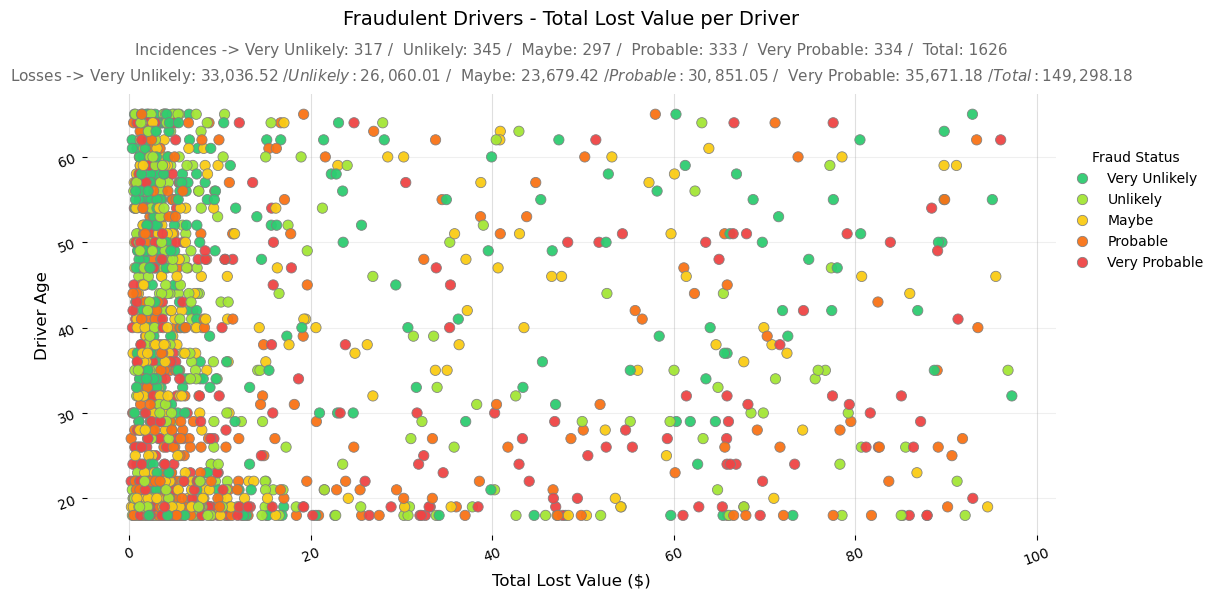

In [270]:
#2 Scatterplot Chart – total lost per driver

fraudulent_drivers = df_nodup[
    (df_nodup['fraudulent_driver?'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',           # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=fraudulent_drivers,
    x='% Total Lost',
    y='driver_age',
    hue='fraudulent_driver?',
    palette=palette,
    s=55,
    edgecolor='gray',
    alpha=0.95,
    ax=ax
)

ax.set_title('Fraudulent Drivers - Total Lost Value per Driver', fontsize=14, pad=50)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('Driver Age', fontsize=12)
ax.set_axisbelow(True)
ax.grid(True, axis='x', alpha=0.4, linestyle='-')
ax.grid(True, axis='y', alpha=0.2, linestyle='-')
ax.legend(
    title='Fraud Status',
    loc='upper left',
    bbox_to_anchor=(1.00, 0.90),
    fontsize=10,
    title_fontsize=10,
    frameon=False
)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20) 

# Total of incidences
total_cases = fraudulent_drivers['driver_age'].count()
veryunlikely = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Unlikely']['driver_age'].count()
unlikely = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Unlikely']['driver_age'].count()
maybe = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Maybe']['driver_age'].count()
probable = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Probable']['driver_age'].count()
veryprobable = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Probable']['driver_age'].count()

# Total of Loss
total_loss = fraudulent_drivers['total_lost_value'].sum()
formatted_loss = f'{round(total_loss,2):,} $'
veryunlikely_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Unlikely']['total_lost_value'].sum()
formatted_veryunlikely_loss = f'{round(veryunlikely_loss,2):,} $'
unlikely_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Unlikely']['total_lost_value'].sum()
formatted_unlikely_loss = f'{round(unlikely_loss,2):,} $'
maybe_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Maybe']['total_lost_value'].sum()
formatted_maybe_loss = f'{round(maybe_loss,2):,} $'
probable_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Probable']['total_lost_value'].sum()
formatted_probable_loss = f'{round(probable_loss,2):,} $'
veryprobable_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Probable']['total_lost_value'].sum()
formatted_veryprobable_loss = f'{round(veryprobable_loss,2):,} $'

#total_cases_150 = fraudulent_drivers_150['driver_age'].count()
#perc_150_total = total_cases_150/total_cases

#plt.text(0.5, 1.09, 'Total of incidences down below', transform=ax.transAxes, ha='center', fontsize=11, color='dimgray')
#plt.text(0.5, 1.03, 'Total lost value: ' + formatted_loss, transform=ax.transAxes, ha='center', fontsize=11, color='dimgray')
plt.text(0.5, 1.09, 
         'Incidences -> ' +
         'Very Unlikely: ' + str(veryunlikely) + ' / ' +
         ' Unlikely: ' + str(unlikely) + ' / ' +
         ' Maybe: ' + str(maybe) + ' / ' +
         ' Probable: ' + str(probable) + ' / ' +
         ' Very Probable: ' + str(veryprobable) + ' / ' +
         ' Total: ' + str(total_cases),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.text(0.5, 1.03, 
         'Losses -> ' +
         'Very Unlikely: ' + str(formatted_veryunlikely_loss) + ' / ' +
         ' Unlikely: ' + str(formatted_unlikely_loss) + ' / ' +
         ' Maybe: ' + str(formatted_maybe_loss) + ' / ' +
         ' Probable: ' + str(formatted_probable_loss) + ' / ' +
         ' Very Probable: ' + str(formatted_veryprobable_loss) + ' / ' +
         ' Total: ' + str(formatted_loss),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.show()



C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\3271763596.py:35: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, axis='x', alpha=0.4, linestyle='-')
C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\3271763596.py:36: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, axis='y', alpha=0.2, linestyle='-')


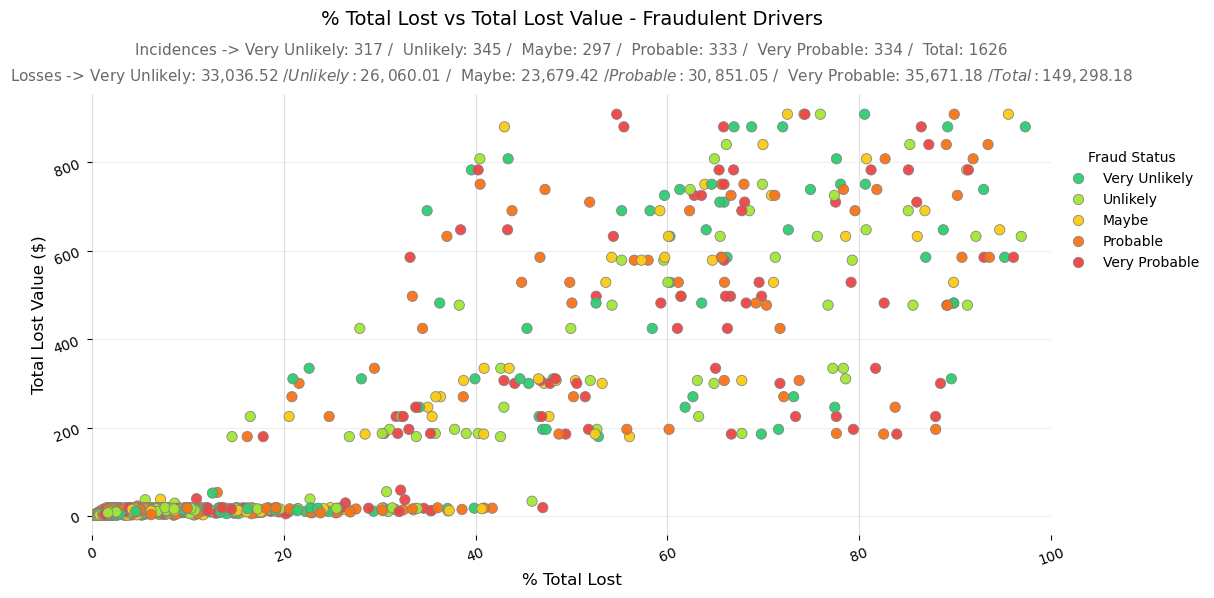

In [271]:
# Filter data
fraudulent_drivers = df_nodup[
    (df_nodup['fraudulent_driver?'].notna()) &
    (df_nodup['% Total Lost'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

# Color palette
palette = {
    'Very Unlikely': '#2ecc71',
    'Unlikely': '#a3e635',
    'Maybe': '#facc15',
    'Probable': '#f97316',
    'Very Probable': '#ef4444'
}

# Scatter plot
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(
    data=fraudulent_drivers,
    x='% Total Lost',
    y='total_lost_value',
    hue='fraudulent_driver?',
    palette=palette,
    s=55,
    edgecolor='gray',
    alpha=0.95,
    ax=ax
)

ax.set_title('% Total Lost vs Total Lost Value - Fraudulent Drivers', fontsize=14, pad=50)
ax.set_xlabel('% Total Lost', fontsize=12)
ax.set_ylabel('Total Lost Value ($)', fontsize=12)
ax.set_axisbelow(True)
ax.grid(False, axis='x', alpha=0.4, linestyle='-')
ax.grid(False, axis='y', alpha=0.2, linestyle='-')

# Optional: limit x-axis to 0–100 if percentages are in that range
ax.set_xlim(0, 100)

ax.legend(
    title='Fraud Status',
    loc='upper left',
    bbox_to_anchor=(1.00, 0.90),
    fontsize=10,
    title_fontsize=10,
    frameon=False
)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20)

# --- Summaries ---
# Count of incidences
total_cases = fraudulent_drivers['total_lost_value'].count()
veryunlikely = (fraudulent_drivers['fraudulent_driver?'] == 'Very Unlikely').sum()
unlikely = (fraudulent_drivers['fraudulent_driver?'] == 'Unlikely').sum()
maybe = (fraudulent_drivers['fraudulent_driver?'] == 'Maybe').sum()
probable = (fraudulent_drivers['fraudulent_driver?'] == 'Probable').sum()
veryprobable = (fraudulent_drivers['fraudulent_driver?'] == 'Very Probable').sum()

# Total Lost by fraud class
total_loss = fraudulent_drivers['total_lost_value'].sum()
fmt_loss = lambda v: f'{round(v,2):,} $'

veryunlikely_loss = fraudulent_drivers.loc[fraudulent_drivers['fraudulent_driver?']=='Very Unlikely','total_lost_value'].sum()
unlikely_loss = fraudulent_drivers.loc[fraudulent_drivers['fraudulent_driver?']=='Unlikely','total_lost_value'].sum()
maybe_loss = fraudulent_drivers.loc[fraudulent_drivers['fraudulent_driver?']=='Maybe','total_lost_value'].sum()
probable_loss = fraudulent_drivers.loc[fraudulent_drivers['fraudulent_driver?']=='Probable','total_lost_value'].sum()
veryprobable_loss = fraudulent_drivers.loc[fraudulent_drivers['fraudulent_driver?']=='Very Probable','total_lost_value'].sum()

plt.text(
    0.5, 1.09,
    'Incidences -> '
    f'Very Unlikely: {veryunlikely} / '
    f' Unlikely: {unlikely} / '
    f' Maybe: {maybe} / '
    f' Probable: {probable} / '
    f' Very Probable: {veryprobable} / '
    f' Total: {total_cases}',
    transform=ax.transAxes, ha='center', fontsize=11, color='dimgray'
)

plt.text(
    0.5, 1.03,
    'Losses -> '
    f'Very Unlikely: {fmt_loss(veryunlikely_loss)} / '
    f' Unlikely: {fmt_loss(unlikely_loss)} / '
    f' Maybe: {fmt_loss(maybe_loss)} / '
    f' Probable: {fmt_loss(probable_loss)} / '
    f' Very Probable: {fmt_loss(veryprobable_loss)} / '
    f' Total: {fmt_loss(total_loss)}',
    transform=ax.transAxes, ha='center', fontsize=11, color='dimgray'
)

plt.show()


C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\909425808.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(


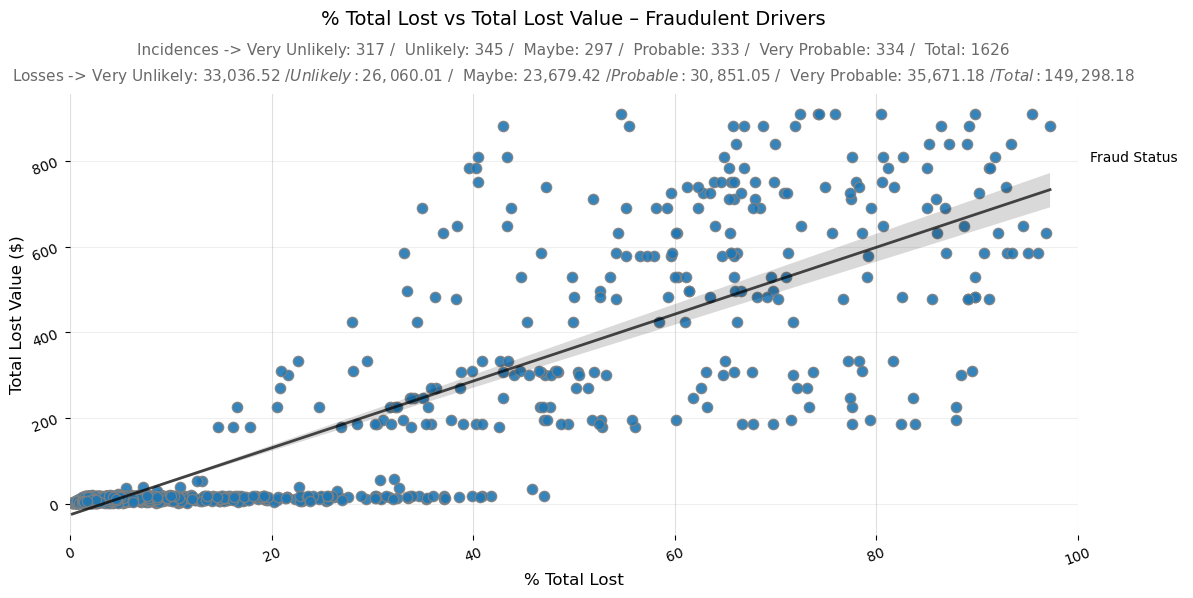

In [272]:
# Filter data
fraudulent_drivers = df_nodup[
    (df_nodup['fraudulent_driver?'].notna()) &
    (df_nodup['% Total Lost'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

# Color palette
palette = {
    'Very Unlikely': '#2ecc71',
    'Unlikely': '#a3e635',
    'Maybe': '#facc15',
    'Probable': '#f97316',
    'Very Probable': '#ef4444'
}

# Reg plot
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(
    data=fraudulent_drivers,
    x='% Total Lost',
    y='total_lost_value',
    scatter_kws={'s':55, 'edgecolor':'gray', 'alpha':0.9},
    line_kws={'color':'black', 'lw':2, 'alpha':0.7},
    ax=ax
)

ax.set_title('% Total Lost vs Total Lost Value – Fraudulent Drivers', fontsize=14, pad=50)
ax.set_xlabel('% Total Lost', fontsize=12)
ax.set_ylabel('Total Lost Value ($)', fontsize=12)
ax.set_axisbelow(True)
ax.grid(True, axis='x', alpha=0.4, linestyle='-')
ax.grid(True, axis='y', alpha=0.2, linestyle='-')

# Optional: limit x-axis to 0–100 if percentages are in that range
ax.set_xlim(0, 100)

ax.legend(
    title='Fraud Status',
    loc='upper left',
    bbox_to_anchor=(1.00, 0.90),
    fontsize=10,
    title_fontsize=10,
    frameon=False
)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20)

# --- Summaries ---
# Count of incidences
total_cases = fraudulent_drivers['total_lost_value'].count()
veryunlikely = (fraudulent_drivers['fraudulent_driver?'] == 'Very Unlikely').sum()
unlikely = (fraudulent_drivers['fraudulent_driver?'] == 'Unlikely').sum()
maybe = (fraudulent_drivers['fraudulent_driver?'] == 'Maybe').sum()
probable = (fraudulent_drivers['fraudulent_driver?'] == 'Probable').sum()
veryprobable = (fraudulent_drivers['fraudulent_driver?'] == 'Very Probable').sum()

# Total Lost by fraud class
total_loss = fraudulent_drivers['total_lost_value'].sum()
fmt_loss = lambda v: f'{round(v,2):,} $'

veryunlikely_loss = fraudulent_drivers.loc[fraudulent_drivers['fraudulent_driver?']=='Very Unlikely','total_lost_value'].sum()
unlikely_loss = fraudulent_drivers.loc[fraudulent_drivers['fraudulent_driver?']=='Unlikely','total_lost_value'].sum()
maybe_loss = fraudulent_drivers.loc[fraudulent_drivers['fraudulent_driver?']=='Maybe','total_lost_value'].sum()
probable_loss = fraudulent_drivers.loc[fraudulent_drivers['fraudulent_driver?']=='Probable','total_lost_value'].sum()
veryprobable_loss = fraudulent_drivers.loc[fraudulent_drivers['fraudulent_driver?']=='Very Probable','total_lost_value'].sum()

plt.text(
    0.5, 1.09,
    'Incidences -> '
    f'Very Unlikely: {veryunlikely} / '
    f' Unlikely: {unlikely} / '
    f' Maybe: {maybe} / '
    f' Probable: {probable} / '
    f' Very Probable: {veryprobable} / '
    f' Total: {total_cases}',
    transform=ax.transAxes, ha='center', fontsize=11, color='dimgray'
)

plt.text(
    0.5, 1.03,
    'Losses -> '
    f'Very Unlikely: {fmt_loss(veryunlikely_loss)} / '
    f' Unlikely: {fmt_loss(unlikely_loss)} / '
    f' Maybe: {fmt_loss(maybe_loss)} / '
    f' Probable: {fmt_loss(probable_loss)} / '
    f' Very Probable: {fmt_loss(veryprobable_loss)} / '
    f' Total: {fmt_loss(total_loss)}',
    transform=ax.transAxes, ha='center', fontsize=11, color='dimgray'
)

plt.show()


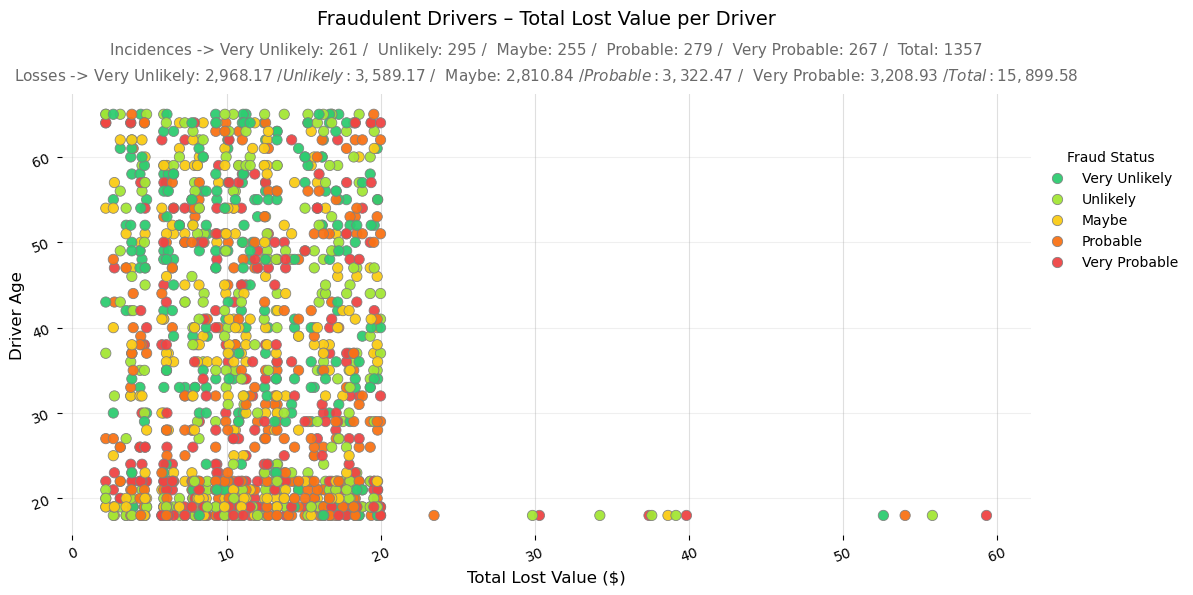

In [273]:
#2 Scatterplot Chart – total lost per driver less than 150 $

fraudulent_drivers = df_nodup[
    (df_nodup['fraudulent_driver?'].notna()) &
    (df_nodup['total_lost_value'] < 150)
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',        # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=fraudulent_drivers,
    x='total_lost_value',
    y='driver_age',
    hue='fraudulent_driver?',
    palette=palette,
    s=55,
    edgecolor='gray',
    alpha=0.95,
    ax=ax
)

ax.set_title('Fraudulent Drivers – Total Lost Value per Driver', fontsize=14, pad=50)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('Driver Age', fontsize=12)
ax.set_axisbelow(True)
ax.grid(True, axis='x', alpha=0.4, linestyle='-')
ax.grid(True, axis='y', alpha=0.2, linestyle='-')
ax.legend(
    title='Fraud Status',
    loc='upper left',
    bbox_to_anchor=(1.00, 0.90),
    fontsize=10,
    title_fontsize=10,
    frameon=False
)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20) 

# Total of incidences
total_cases = fraudulent_drivers['driver_age'].count()
veryunlikely = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Unlikely']['driver_age'].count()
unlikely = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Unlikely']['driver_age'].count()
maybe = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Maybe']['driver_age'].count()
probable = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Probable']['driver_age'].count()
veryprobable = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Probable']['driver_age'].count()

# Total of Loss
total_loss = fraudulent_drivers['total_lost_value'].sum()
formatted_loss = f'{round(total_loss,2):,} $'
veryunlikely_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Unlikely']['total_lost_value'].sum()
formatted_veryunlikely_loss = f'{round(veryunlikely_loss,2):,} $'
unlikely_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Unlikely']['total_lost_value'].sum()
formatted_unlikely_loss = f'{round(unlikely_loss,2):,} $'
maybe_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Maybe']['total_lost_value'].sum()
formatted_maybe_loss = f'{round(maybe_loss,2):,} $'
probable_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Probable']['total_lost_value'].sum()
formatted_probable_loss = f'{round(probable_loss,2):,} $'
veryprobable_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Probable']['total_lost_value'].sum()
formatted_veryprobable_loss = f'{round(veryprobable_loss,2):,} $'

#total_cases_150 = fraudulent_drivers_150['driver_age'].count()
#perc_150_total = total_cases_150/total_cases

#plt.text(0.5, 1.09, 'Total of incidences down below', transform=ax.transAxes, ha='center', fontsize=11, color='dimgray')
#plt.text(0.5, 1.03, 'Total lost value: ' + formatted_loss, transform=ax.transAxes, ha='center', fontsize=11, color='dimgray')
plt.text(0.5, 1.09, 
         'Incidences -> ' +
         'Very Unlikely: ' + str(veryunlikely) + ' / ' +
         ' Unlikely: ' + str(unlikely) + ' / ' +
         ' Maybe: ' + str(maybe) + ' / ' +
         ' Probable: ' + str(probable) + ' / ' +
         ' Very Probable: ' + str(veryprobable) + ' / ' +
         ' Total: ' + str(total_cases),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.text(0.5, 1.03, 
         'Losses -> ' +
         'Very Unlikely: ' + str(formatted_veryunlikely_loss) + ' / ' +
         ' Unlikely: ' + str(formatted_unlikely_loss) + ' / ' +
         ' Maybe: ' + str(formatted_maybe_loss) + ' / ' +
         ' Probable: ' + str(formatted_probable_loss) + ' / ' +
         ' Very Probable: ' + str(formatted_veryprobable_loss) + ' / ' +
         ' Total: ' + str(formatted_loss),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.show()



With the previous two charts before we can have a important insight

- 83.45% (1357 cases) of our cases happens with low losses, representing approximately 10.65% (15,899.58$) of our total loss.
- 16.55% (1626 cases) of all cases represent 89.35% (133.398,60$) of our total loss.

Our efforts should be directed to prevent the loss of orders with high prices. Orders with low amount of money 

#### 2.2 Total Lost per Customer

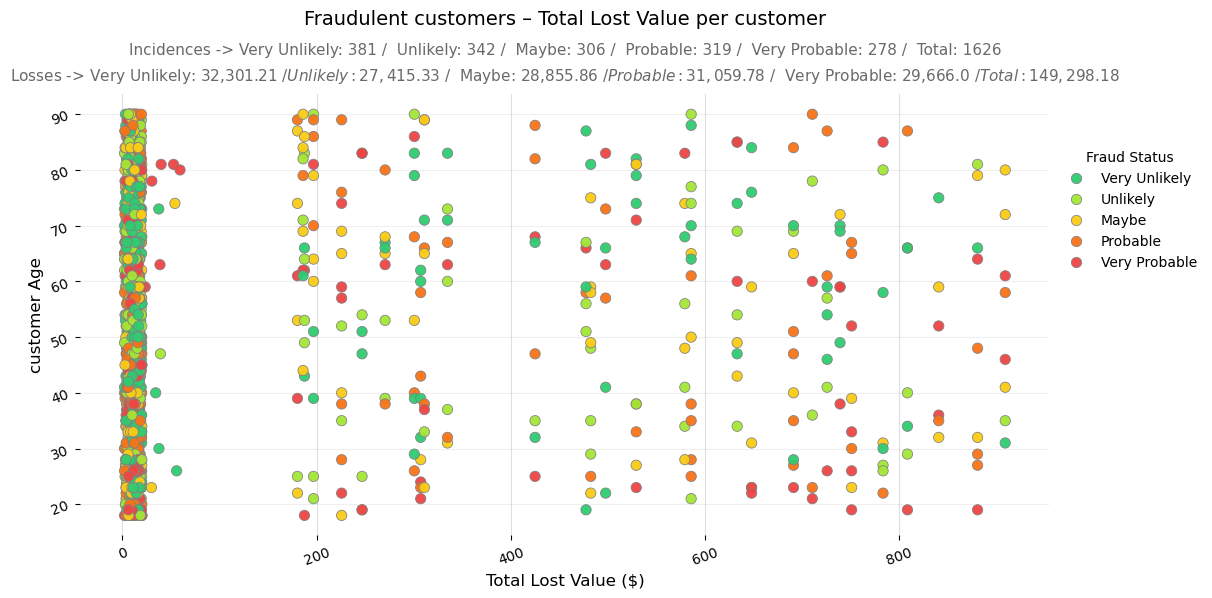

In [274]:
#2 Scatterplot Chart – total lost per customer

fraudulent_customer = df_nodup[
    (df_nodup['fraudulent_customer?'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',           # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=fraudulent_customer,
    x='total_lost_value',
    y='customer_age',
    hue='fraudulent_customer?',
    palette=palette,
    s=55,
    edgecolor='gray',
    alpha=0.95,
    ax=ax
)

ax.set_title('Fraudulent customers – Total Lost Value per customer', fontsize=14, pad=50)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('customer Age', fontsize=12)
ax.set_axisbelow(True)
ax.grid(True, axis='x', alpha=0.4, linestyle='-')
ax.grid(True, axis='y', alpha=0.2, linestyle='-')
ax.legend(
    title='Fraud Status',
    loc='upper left',
    bbox_to_anchor=(1.00, 0.90),
    fontsize=10,
    title_fontsize=10,
    frameon=False
)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20) 

# Total of incidences
total_cases = fraudulent_customer['customer_age'].count()
veryunlikely = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Unlikely']['customer_age'].count()
unlikely = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Unlikely']['customer_age'].count()
maybe = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Maybe']['customer_age'].count()
probable = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Probable']['customer_age'].count()
veryprobable = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Probable']['customer_age'].count()

# Total of Loss
total_loss = fraudulent_customer['total_lost_value'].sum()
formatted_loss = f'{round(total_loss,2):,} $'
veryunlikely_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Unlikely']['total_lost_value'].sum()
formatted_veryunlikely_loss = f'{round(veryunlikely_loss,2):,} $'
unlikely_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Unlikely']['total_lost_value'].sum()
formatted_unlikely_loss = f'{round(unlikely_loss,2):,} $'
maybe_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Maybe']['total_lost_value'].sum()
formatted_maybe_loss = f'{round(maybe_loss,2):,} $'
probable_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Probable']['total_lost_value'].sum()
formatted_probable_loss = f'{round(probable_loss,2):,} $'
veryprobable_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Probable']['total_lost_value'].sum()
formatted_veryprobable_loss = f'{round(veryprobable_loss,2):,} $'

plt.text(0.5, 1.09, 
         'Incidences -> ' +
         'Very Unlikely: ' + str(veryunlikely) + ' / ' +
         ' Unlikely: ' + str(unlikely) + ' / ' +
         ' Maybe: ' + str(maybe) + ' / ' +
         ' Probable: ' + str(probable) + ' / ' +
         ' Very Probable: ' + str(veryprobable) + ' / ' +
         ' Total: ' + str(total_cases),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.text(0.5, 1.03, 
         'Losses -> ' +
         'Very Unlikely: ' + str(formatted_veryunlikely_loss) + ' / ' +
         ' Unlikely: ' + str(formatted_unlikely_loss) + ' / ' +
         ' Maybe: ' + str(formatted_maybe_loss) + ' / ' +
         ' Probable: ' + str(formatted_probable_loss) + ' / ' +
         ' Very Probable: ' + str(formatted_veryprobable_loss) + ' / ' +
         ' Total: ' + str(formatted_loss),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.show()



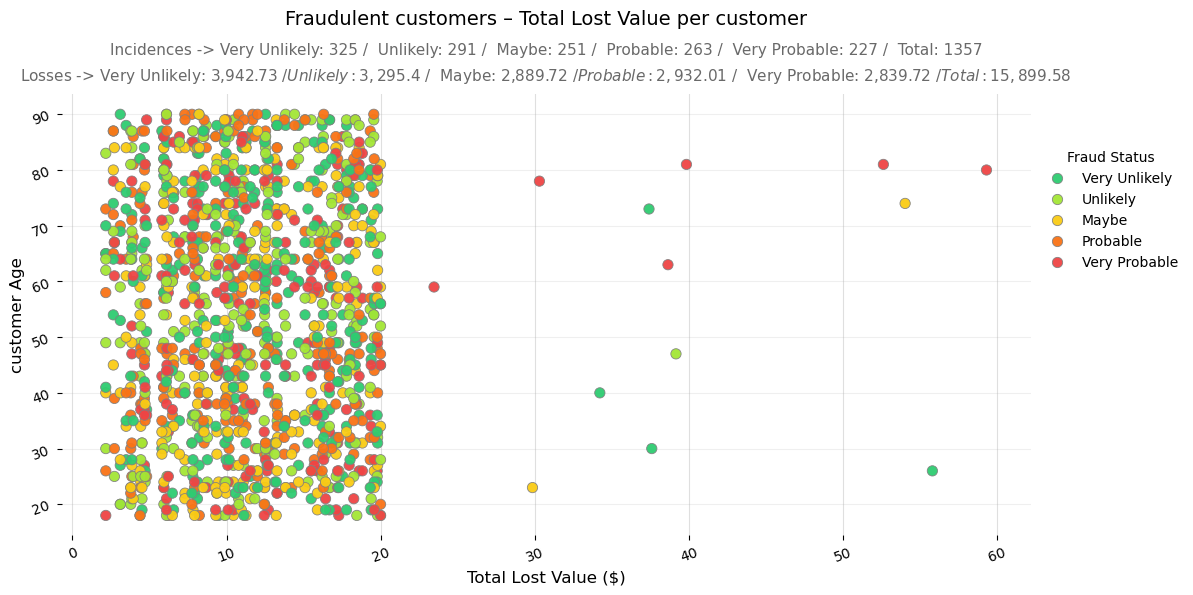

In [275]:
#2 Scatterplot Chart – total lost per customer below 150$

fraudulent_customer = df_nodup[
    (df_nodup['fraudulent_customer?'].notna()) &
    (df_nodup['total_lost_value']<150)
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',           # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=fraudulent_customer,
    x='total_lost_value',
    y='customer_age',
    hue='fraudulent_customer?',
    palette=palette,
    s=55,
    edgecolor='gray',
    alpha=0.95,
    ax=ax
)

ax.set_title('Fraudulent customers – Total Lost Value per customer', fontsize=14, pad=50)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('customer Age', fontsize=12)
ax.set_axisbelow(True)
ax.grid(True, axis='x', alpha=0.4, linestyle='-')
ax.grid(True, axis='y', alpha=0.2, linestyle='-')
ax.legend(
    title='Fraud Status',
    loc='upper left',
    bbox_to_anchor=(1.00, 0.90),
    fontsize=10,
    title_fontsize=10,
    frameon=False
)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20) 

# Total of incidences
total_cases = fraudulent_customer['customer_age'].count()
veryunlikely = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Unlikely']['customer_age'].count()
unlikely = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Unlikely']['customer_age'].count()
maybe = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Maybe']['customer_age'].count()
probable = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Probable']['customer_age'].count()
veryprobable = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Probable']['customer_age'].count()

# Total of Loss
total_loss = fraudulent_customer['total_lost_value'].sum()
formatted_loss = f'{round(total_loss,2):,} $'
veryunlikely_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Unlikely']['total_lost_value'].sum()
formatted_veryunlikely_loss = f'{round(veryunlikely_loss,2):,} $'
unlikely_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Unlikely']['total_lost_value'].sum()
formatted_unlikely_loss = f'{round(unlikely_loss,2):,} $'
maybe_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Maybe']['total_lost_value'].sum()
formatted_maybe_loss = f'{round(maybe_loss,2):,} $'
probable_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Probable']['total_lost_value'].sum()
formatted_probable_loss = f'{round(probable_loss,2):,} $'
veryprobable_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Probable']['total_lost_value'].sum()
formatted_veryprobable_loss = f'{round(veryprobable_loss,2):,} $'

plt.text(0.5, 1.09, 
         'Incidences -> ' +
         'Very Unlikely: ' + str(veryunlikely) + ' / ' +
         ' Unlikely: ' + str(unlikely) + ' / ' +
         ' Maybe: ' + str(maybe) + ' / ' +
         ' Probable: ' + str(probable) + ' / ' +
         ' Very Probable: ' + str(veryprobable) + ' / ' +
         ' Total: ' + str(total_cases),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.text(0.5, 1.03, 
         'Losses -> ' +
         'Very Unlikely: ' + str(formatted_veryunlikely_loss) + ' / ' +
         ' Unlikely: ' + str(formatted_unlikely_loss) + ' / ' +
         ' Maybe: ' + str(formatted_maybe_loss) + ' / ' +
         ' Probable: ' + str(formatted_probable_loss) + ' / ' +
         ' Very Probable: ' + str(formatted_veryprobable_loss) + ' / ' +
         ' Total: ' + str(formatted_loss),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.show()



With the previous two charts before we can have a important insight

- 83.45% (1357 cases) of our cases happens with low losses, representing approximately 10.65% (15,899.58$) of our total loss.
- 16.55% (1626 cases) of all cases represent 89.35% (133.398,60$) of our total loss.

Our efforts should be directed to prevent the loss of orders with high prices. Orders with low amount of money 

Doing this analysis we conclude an overall insight that the major of losses were realized by the minor of orders. We couldn't analyse more precisely who is the one more responsible for our losses: customer or drivers. For that, we may use a different approach in the future.

### 3. Pie Chart

#### 3.1 Total Lost per Customer

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\1407873194.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_loss = fraudulent_customer.groupby('fraudulent_customer?')['total_lost_value'].sum().sort_values(ascending=False)


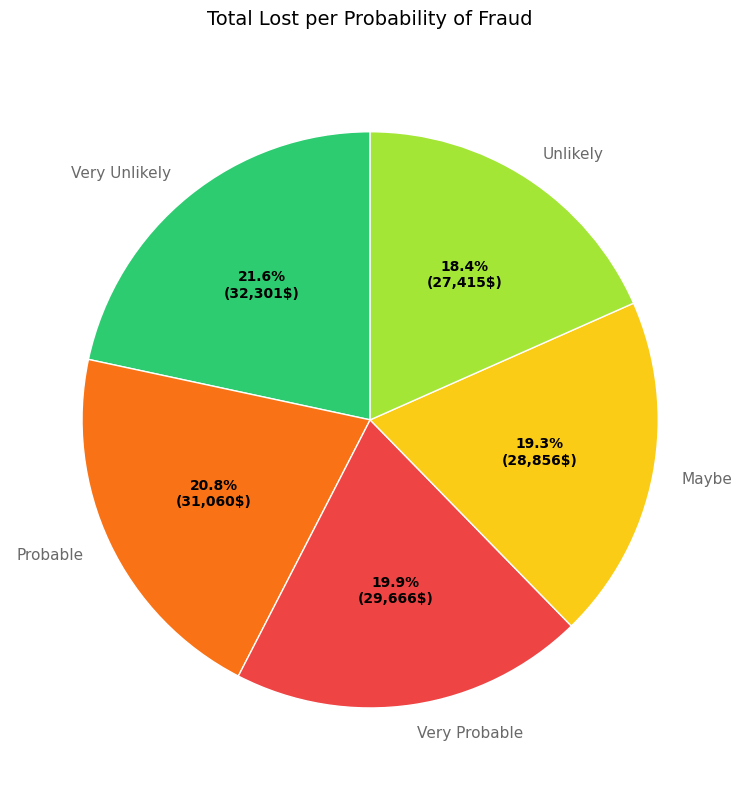

In [276]:
# Pie Chart – Total Lost per Probability of Fraud by customer

fraudulent_customer = df_nodup[
    (df_nodup['fraudulent_customer?'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',           # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

# Calculate total lost value per fraud category
fraud_loss = fraudulent_customer.groupby('fraudulent_customer?')['total_lost_value'].sum().sort_values(ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    fraud_loss,
    labels=fraud_loss.index,
    autopct=lambda p: f'{p:.1f}%\n({fraud_loss.sum() * p / 100:,.0f}$)',
    colors=[palette[label] for label in fraud_loss.index],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'color': 'dimgray', 'fontsize': 11}
)

# Title and styling
ax.set_title('Total Lost per Probability of Fraud', fontsize=14, pad=25)
plt.setp(autotexts, size=10, weight='bold', color='black')
plt.tight_layout()
plt.show()


#### 3.2 Total Lost per Driver

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\1471919117.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_loss = fraudulent_driver.groupby('fraudulent_driver?')['total_lost_value'].sum().sort_values(ascending=False)


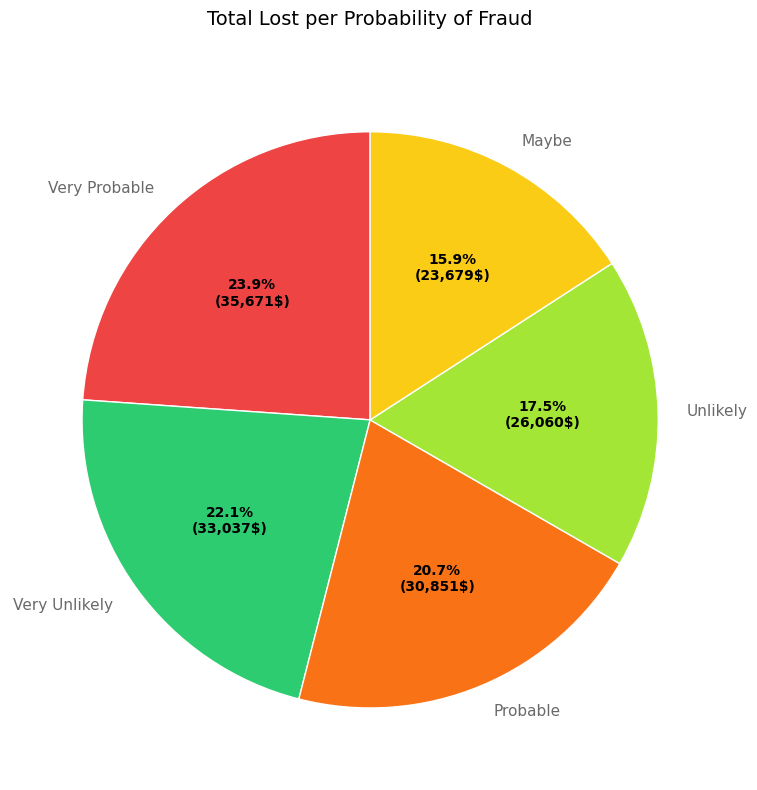

In [277]:
# Pie Chart – Total Lost per Probability of Fraud by driver

fraudulent_driver = df_nodup[
    (df_nodup['fraudulent_driver?'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',           # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

# Calculate total lost value per fraud category
fraud_loss = fraudulent_driver.groupby('fraudulent_driver?')['total_lost_value'].sum().sort_values(ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    fraud_loss,
    labels=fraud_loss.index,
    autopct=lambda p: f'{p:.1f}%\n({fraud_loss.sum() * p / 100:,.0f}$)',
    colors=[palette[label] for label in fraud_loss.index],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'color': 'dimgray', 'fontsize': 11}
)

# Title and styling
ax.set_title('Total Lost per Probability of Fraud', fontsize=14, pad=25)
plt.setp(autotexts, size=10, weight='bold', color='black')
plt.tight_layout()
plt.show()


### 4. Total Lost During the Day (Hours)

In [278]:
df_nodup.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders,multiplier,total_lost_value,customer_incidence,lost_incidence_customer,fraudulent_customer?,driver_incidence,lost_incidence_driver,fraudulent_driver?,real_order_amount,% Total Lost
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN,10,NaN,NaN,1.0,0.100,Very Unlikely,3.0,0.062,Unlikely,NaN,NaN
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN,11,NaN,NaN,1.0,0.091,Very Unlikely,NaN,NaN,NaN,NaN,NaN
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN,7,NaN,NaN,1.0,0.143,Very Unlikely,NaN,NaN,NaN,NaN,NaN
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN,5,NaN,NaN,1.0,0.200,Unlikely,NaN,NaN,NaN,NaN,NaN


In [279]:
df_nodup['delivery_hour'].iloc[0]

datetime.time(4, 2, 37)

C:\Users\amcys\AppData\Local\Temp\ipykernel_20004\2607807985.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_customer['hour'] = fraudulent_customer['delivery_hour'].apply(lambda t: t.hour)


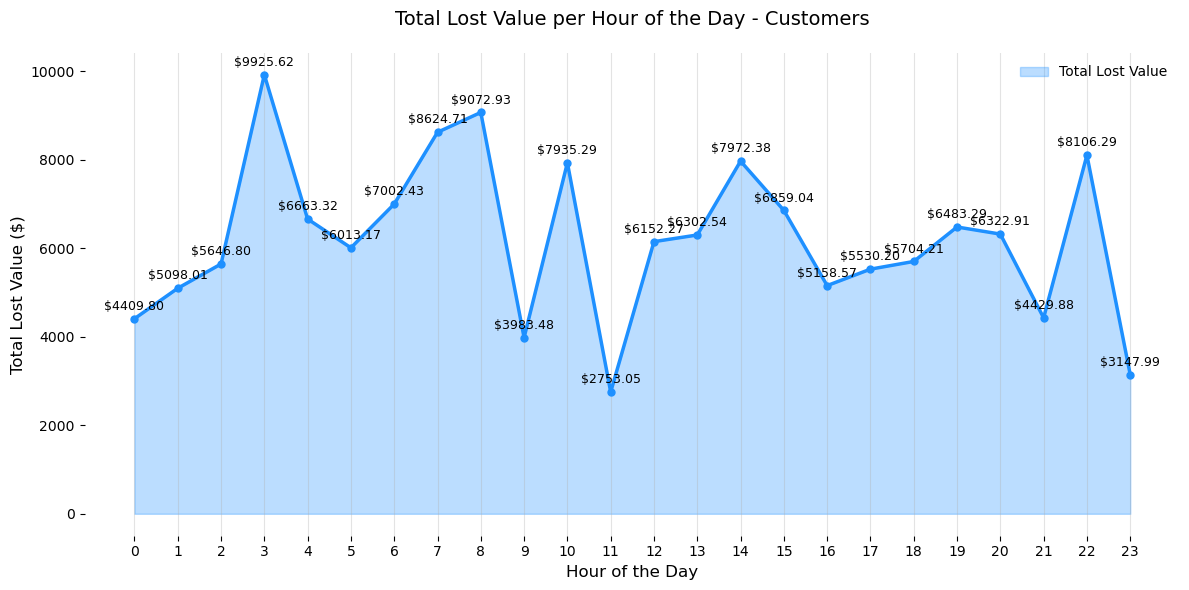

In [280]:
# Area Line Chart – Total Lost Value by Hour of the Day per Customers

fraudulent_customer = df_nodup[
    (df_nodup['fraudulent_customer?'].notna()) &
    (df_nodup['total_lost_value'].notna()) &
    (df_nodup['delivery_hour'].notna())
]

# Convert delivery_hour (datetime.time) to numeric hour (0–23)
fraudulent_customer['hour'] = fraudulent_customer['delivery_hour'].apply(lambda t: t.hour)

# Calculate total lost per hour
hourly_loss = fraudulent_customer.groupby('hour')['total_lost_value'].sum().reset_index()

# Calculate total overall lost
total_lost = hourly_loss['total_lost_value'].sum()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.fill_between(hourly_loss['hour'], hourly_loss['total_lost_value'],
                color='dodgerblue', alpha=0.3, label='Total Lost Value')
ax.plot(hourly_loss['hour'], hourly_loss['total_lost_value'],
        color='dodgerblue', linewidth=2.5, marker='o', markersize=5)

# Annotate each point with total lost value
for i, row in hourly_loss.iterrows():
    ax.text(row['hour'], row['total_lost_value'] + (hourly_loss['total_lost_value'].max() * 0.02),
            f"${row['total_lost_value']:.2f}", ha='center', fontsize=9, color='black')

# Title includes total lost
ax.set_title(f'Total Lost Value per Hour of the Day - Customers', fontsize=14, pad=20)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Total Lost Value ($)', fontsize=12)

ax.grid(True,axis='x', alpha=0.35, linestyle='-')
sns.despine(left=True, bottom=True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.legend(frameon=False)
plt.show()


In [281]:
total_lost_before_8 = hourly_loss.loc[hourly_loss['hour'] <= 8, 'total_lost_value'].sum()
print(f"Total Lost Value before 8 AM: ${total_lost_before_8:,.2f}")

Total Lost Value before 8 AM: $62,456.79


With this chart, we can have a good insight. The 3 biggest "peaks" of total losses happens before 8 AM. This is the period where the company should have more attention to.

### 5. Horizontal Bar Chart

In [282]:
df_nodup.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders,multiplier,total_lost_value,customer_incidence,lost_incidence_customer,fraudulent_customer?,driver_incidence,lost_incidence_driver,fraudulent_driver?,real_order_amount,% Total Lost
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN,10,NaN,NaN,1.0,0.100,Very Unlikely,3.0,0.062,Unlikely,NaN,NaN
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN,11,NaN,NaN,1.0,0.091,Very Unlikely,NaN,NaN,NaN,NaN,NaN
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN,7,NaN,NaN,1.0,0.143,Very Unlikely,NaN,NaN,NaN,NaN,NaN
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN,5,NaN,NaN,1.0,0.200,Unlikely,NaN,NaN,NaN,NaN,NaN


In [283]:
df_nodup['items_missing'].sum()

np.int64(1907)

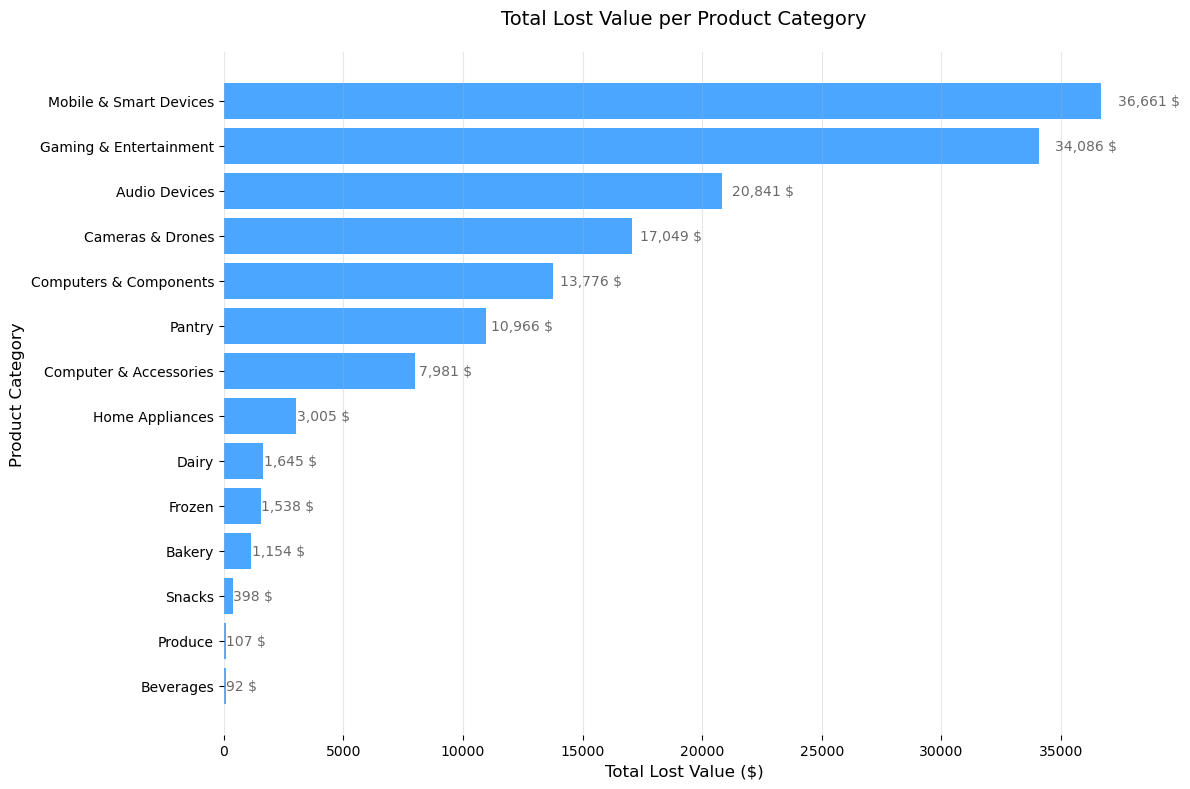

In [284]:
# Horizontal Bar Chart – Total Lost per Product Category

# Filter relevant rows
category_loss = df_nodup[
    (df_nodup['missing_product_category'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

# Group and sum total lost per category
category_loss = (
    category_loss.groupby('missing_product_category')['total_lost_value']
    .sum()
    .sort_values(ascending=True)  # ascending for better horizontal layout
)

# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bars
bars = ax.barh(category_loss.index, category_loss.values, color='dodgerblue', alpha=0.8)

# Title and labels
ax.set_title('Total Lost Value per Product Category', fontsize=14, pad=20)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('Product Category', fontsize=12)

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + (width * 0.02),              # slight offset to the right
            bar.get_y() + bar.get_height()/2,    # centered vertically
            f'{width:,.0f} $',
            va='center', ha='left', fontsize=10, color='dimgray', )

# Style
ax.grid(True, axis='x', alpha=0.3, linestyle='-')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


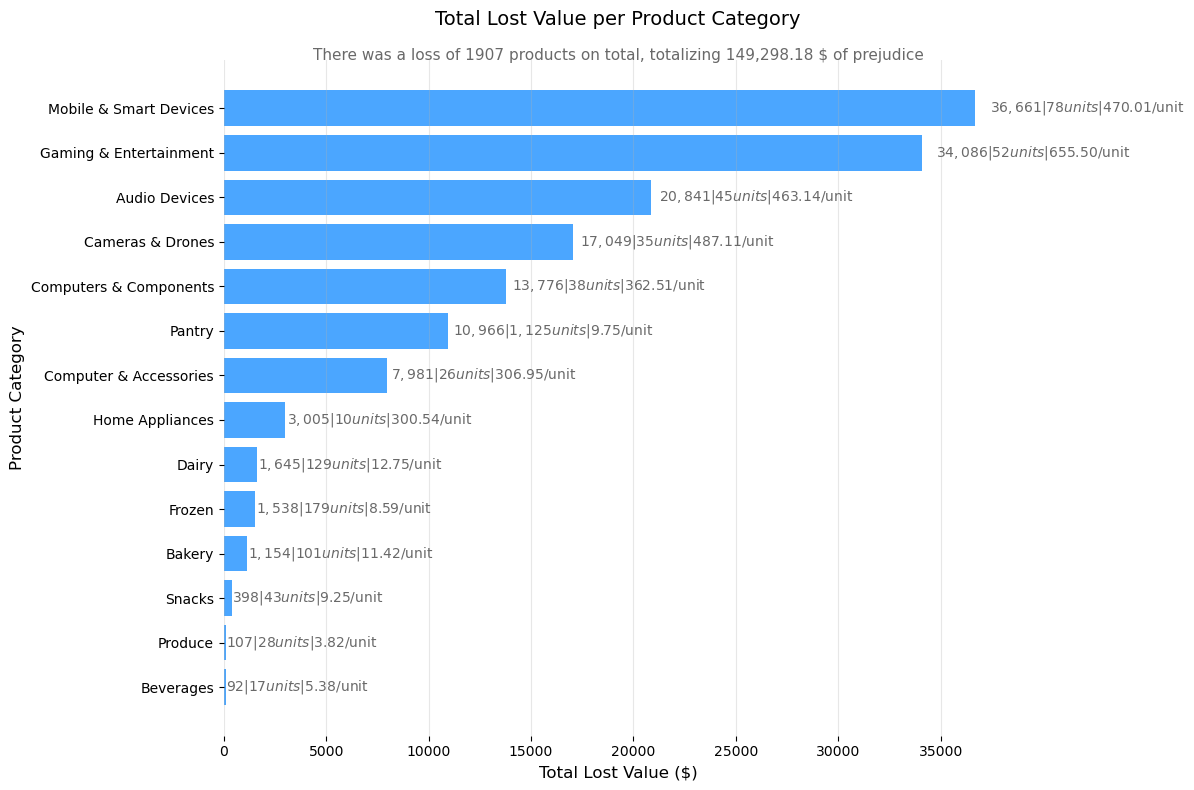

In [285]:
# Horizontal Bar Chart – Total Lost Value per Product Category (with quantity and average ticket)

quantity_lost = df_nodup['items_missing'].sum()

total_loss = fraudulent_customer['total_lost_value'].sum()
formatted_loss = f'{round(total_loss,2):,} $'

# Filter relevant rows
category_loss = df_nodup[
    (df_nodup['missing_product_category'].notna()) &
    (df_nodup['total_lost_value'].notna()) &
    (df_nodup['items_missing'].notna())
]

# Group and sum total lost per category (value and quantity)
category_loss = (
    category_loss.groupby('missing_product_category')[['total_lost_value', 'items_missing']]
    .sum()
    .sort_values('total_lost_value', ascending=True)
)

# Compute average ticket (value per lost quantity)
category_loss['avg_ticket'] = category_loss['total_lost_value'] / category_loss['items_missing']

# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bars (value)
bars = ax.barh(category_loss.index, category_loss['total_lost_value'], 
               color='dodgerblue', alpha=0.8)

# Title and labels
ax.set_title('Total Lost Value per Product Category', fontsize=14, pad=25)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('Product Category', fontsize=12)

# Add value, quantity, and average ticket labels beside each bar
for i, bar in enumerate(bars):
    value = category_loss['total_lost_value'].iloc[i]
    qty = category_loss['items_missing'].iloc[i]
    avg_ticket = category_loss['avg_ticket'].iloc[i]
    
    ax.text(value + (value * 0.02),                     # offset to the right of the bar
            bar.get_y() + bar.get_height()/2,
            f'${value:,.0f}  |  {qty:,.0f} units  |  ${avg_ticket:,.2f}/unit',
            va='center', ha='left', fontsize=10, color='dimgray')

plt.text(0.5, 1.00, f'There was a loss of {quantity_lost} products on total, totalizing {formatted_loss} of prejudice', transform = ax.transAxes, ha='center', fontsize = 11, color = "dimgray")

# Style
ax.grid(True, axis='x', alpha=0.3, linestyle='-')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


This was the most impactful chart. Here, we could analyse that the top 5 products of lost value are responsible for 81.99% of the total loss. The efforts should be directed to those products with the aim of avoiding future losses.